In [ ]:
!pip install markdown2
!pip install openai
!pip install langchain_core
!pip install langchain-openai
!pip install -U langchain-community
!pip install langchain
!pip install langgraph

<style>
    .custom-header {
        color: #4a77d4;
        border-bottom: 2px solid #4a77d4;
        padding-bottom: 5px;
    }
    .custom-text {
        font-family: Arial, sans-serif;
        line-height: 1.6;
    }
</style>

<h1 class="custom-header">Exploration of Florida Corrections Data with AI</h1>

<h3 class="custom-header">Abstract</h3>

<div style="background-color: #FFA07A; padding: 10px; border-radius: 5px;">
    This notebook project uses artificial intelligence to interactively present data provided by the Florida Department of Law Enforcement. After downloading and cleaning the dataset on Florida Department of Corrections incarceration and supervision data, I embedded AI to present the data along with interactive visualizations to represent the data's condition and contents. After the AI presentations, a chatbot has been integrated, allowing users to ask questions, request customizations/adjustments of visualizations or novel ones, or discuss potential insights.
</div>

# Table of Contents

1. [Introduction](#Introduction)
   - [Project Overview](#Project-Overview)
2. [Data Sources](#Data-Sources)
   - [Data Origin and Access](#Data-Origin-and-Access)
   - [Data Updates and Scope](#Data-Updates)
   - Code Importing Libraries, Datasets, and API Keys
3. [Preprocessing, Data Dictionaries, and AI Presentations](#Preprocessing,-Data-Dictionaries,-and-AI-Presentations )
   - [Incarcerationsupervision_00000 File](#Incarcerationsupervision_00000-File)
     - Code: Import, Cleaning, and Data Dictionary Generation
     - Output: df_root Data Dictionary
     - Code: Generating Visualizations
     - Code: Embedding AI for Data Presentaion of Incarcerationsupervision_00000 dataset
     - AI Presentation: Incarcerationsupervision_00000 file and Visualizations
   - [IncarcerationSupervisionCharge_00000 File](#IncarcerationSupervisionCharge_00000-File)
     - Code: Import, Cleaning, and Data Dictionary Generation
     - Output: Data Dictionary
     - Code: Generating Visualizations
     - Code: Embedding AI for Data Presentaion of IncarcerationSupervisionCharge_00000 dataset
     - AI Presentation: IncarcerationSupervisionCharge_00000 file and Visualizations
   - [IncarcerationSupervisionDisciplinary_00000 File](#IncarcerationSupervisionDisciplinary_00000-File)
     - Code: Import, Cleaning, and Data Dictionary Generation
     - Output: Data Dictionary
     - Code: Generating Visualizations
     - Code: Embedding AI for Data Presentaion of IncarcerationsupervisionDisciplinary_00000 dataset
     - AI Presentation: IncarcerationsupervisionDisciplinary_00000 file and Visualizations
4. [AI Chatbot](#Exploratory-Data-Analysis-EDA)
  

# Introduction
## Project Overview
# Florida Department of Corrections Data Access Project

## Project Overview

This initiative aims to enhance public access to Florida Department of Corrections (FDOC) data, as made available by the Florida Department of Law Enforcement (FDLE). The project seeks to transform technically available but practically inaccessible public data into a truly accessible and understandable resource.

## Author Background

The project lead brings a unique perspective to this work:

- Spent nearly 19 years in the FDOC system
- Earned a degree in data science post-incarceration
- Currently works as a data annotator
- Planning to pursue a master's degree in information and data science

The author's experience of incarceration provides valuable context for understanding the data and its importance. However, the author has found that this experience can make the objective presentation of incarceration data difficult.

## Project Goals

1. Clean and organize FDOC data that FDLE is legally required to make public
2. Create a more accessible portal for this data, addressing limitations of the current FDLE public dashboard
3. Provide a platform for public, researchers, and policymakers to explore and analyze the data independently
4. Integrate AI assistance to enhance data navigation and comprehension (experimental approach)

## Key Principles

- **Objectivity**: The project aims to present data as objectively as possible, without drawing conclusions about the correctional or criminal legal systems
- **Transparency**: By improving access to information, the project seeks to facilitate more informed discussions about Florida's correctional system
- **Data Limitations**: Acknowledge and highlight gaps or unclear areas in current reporting
- **Accessibility**: Transform technically available but difficult-to-use public data into a truly accessible and understandable resource

## Expected Impact

This project has the potential to:
- Empower researchers, policymakers, and the public with better access to critical information
- Highlight areas where data collection or reporting could be improved
- Foster more informed discussions and decision-making regarding Florida's correctional system
- Demonstrate innovative approaches to making public data more accessible and useful

# Data Sources

The data used in this project is sourced from the Florida Department of Law Enforcement (FDLE) as part of the Criminal Justice Data Transparency (CJDT) initiative. This initiative was established by the Florida Legislature through Florida Statutes §900.05 and §943.6871 to increase public visibility of criminal justice processes throughout the state and provide policymakers with information for informed decision-making. As per the CJDT data specifications it should include the records of juveniles treated as adults and the records of adults only.


### Data Origin and Access

The raw data is available through the [FDC Incarceration and Supervision Reports](https://www.fdle.state.fl.us/CJAB/CJDT/FDC-IS-Reports) page on the FDLE website.

For a description of the CJDT initiative and the data it encompasses, please refer to the [Criminal Justice Data Transparency](https://www.fdle.state.fl.us/CJAB/CJDT) page.

In this project, we are specifically working with the Incarceration and Supervision Reports from the Florida Department of Corrections, which form a subset of the larger FDLE CJDT initiative.

**The following context from the first of the two previous links is of critical importance:**

<div style="background-color: #f0f0f0; padding: 10px; border-radius: 5px;">

"The CJDT data collection process began in 2020 upon establishing state and local system capabilities that allow electronic data transmission from the contributor agencies to FDLE. CJDT records go only as far back as the inception of the initiative in 2018. However, if individual agencies choose to provide older records as part of their submission process, they will be included in the publicly available datasets."</div>

It is **not clear** if the records in the dataset are for those currently in custody or under supervision, or if they include everyone who has been under the jurisdiction of the Florida Department of Corrections since that time.

### Data Updates

While the FDLE updates the CJDT data daily, this project operates on a monthly update cycle. The data used in this analysis is manually retrieved and updated on a monthly basis. The project may eventually be updated to establish a live connection to the data source.

The most recent data download used in this analysis was performed on 2024-07-07.

This notebook is designed to dynamically update its analysis when new data is provided. To update the data:

1. Download and unzip the latest data file from the FDLE website. This single file contains all three required datasets.
2. Upload the new file to this notebook's environment.
3. Update the filepath in the notebook to point to the new file.
4. Run the notebook to automatically incorporate the new data into the analysis.

In [4]:
# Working with files from:
update_path = 'fdle-fl-data-2024-07'

# Picking an AI model
model = "gpt-4o-mini"

# Libraries 
import os
import re
import sys
import json
import time
import math
import folium
import altair as alt
import datetime
import pandas as pd
import numpy as np
import geopandas as gpd
import openai
import ipywidgets as widgets
from io import StringIO
import io
from contextlib import redirect_stdout
from IPython.display import display, Markdown, HTML, Image
from markdown2 import markdown
from typing import Union, Tuple, Dict, Any
from folium.plugins import MarkerCluster
from kaggle_secrets import UserSecretsClient
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain.memory import ConversationBufferWindowMemory
from langchain_core.tools import tool, Tool
from langchain.schema import SystemMessage, HumanMessage, AIMessage
from langgraph.prebuilt import create_react_agent
import branca.colormap as cm



# Datasets
df_charges = pd.read_csv('/kaggle/input/' + update_path + '/IncarcerationSupervisionCharge_00000.csv')
df_dis = pd.read_csv('/kaggle/input/' + update_path + '/IncarcerationSupervisionDisciplinary_00000.csv')
df_root = pd.read_csv('/kaggle/input/' + update_path + '/Incarcerationsupervision_00000.csv')

# Bringing in API Keys
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("OpenAIKey")
secret_value_1 = user_secrets.get_secret("tracker API")

# Connecting to Langsmith for Model Traces
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = secret_value_1
os.environ["LANGCHAIN_PROJECT"] = "fdle-fdoc-data"

# Function for parsing markdown metadata
def extract_rows(markdown_string, column_names):
    results = []
    
    for column_name in column_names:
        # Pattern to match the entire row
        pattern = rf"\| *{re.escape(column_name)} *\|.*?(?=\n\||\Z)"
        
        # Search for the pattern in the markdown string
        match = re.search(pattern, markdown_string, re.DOTALL)
        
        if match:
            # Add the matched row to the results, stripping any leading/trailing whitespace
            results.append(match.group().strip())
        else:
            results.append(f"Column '{column_name}' not found in the markdown string.")
    
    # Join all results into a single string, separated by newlines
    return '\n'.join(results)

# Data Import, Preprocessing, and Data Dictionaries

## Incarcerationsupervision_00000 Dataset

In [5]:
# List of columns to drop from the df_root DataFrame
root_to_drop = ['STATE', 'UNIQUE_CORRELATION_ID', 'OWNER_ORI', 'PERSON_ID', 'MDM_PERSON_ID', 'CURRENT_INSTITUTION_ORI_TYP_CODE', 'INCAR_CUSTODY_LEVEL_TYPE_CODE', 'CORRECTION_ADMISSION_REASON_CODE', 'SUPERVISION_CATEGORY_CODE', 'AGENCY_NAME', 'CUSTODY_RELEASE_REASON_CODE']
# Drop the specified columns
df_root = df_root.drop(columns = root_to_drop)

# Convert 'INMATE_AGE' column to unsigned 8-bit integer type
int_columns = ['INMATE_AGE']
for col in df_root[int_columns]:
        df_root[col] = df_root[col].astype('uint8')        

# Convert specified columns to categorical type
categorical_columns = ['RACE_CODE', 'SEX_CODE', 'ETHNICITY_CODE', 'CORRECTION_ADMISSION_REASON_DESC', 
                       'CURRENT_INSTITUTION_ORI_TYPE_DESC', 'CUSTODY_RELEASE_REASON_DESC', 'SUPERVISION_CATEGORY_DESC', 'COUNTY_DESCRIPTION']
for col in categorical_columns:
    df_root[col] = df_root[col].astype('category')

# Convert date columns to datetime type
datetime_columns = ['CUSTODY_ADMISSION_DATE', 'SUPERVISION_BEGIN_DATE']
for col in datetime_columns:
    df_root[col] = pd.to_datetime(df_root[col])

# Define the order of education levels
education_order = [
    'Unknown', 'First Grade', 'Second Grade', 'Third Grade', 'Fourth Grade', 'Fifth Grade',
    'Six Grade', 'Seventh Grade', 'Eighth Grade', 'Ninth Grade', 'Tenth Grade',
    'Eleventh Grade', 'Twelfth Grade', 'First Year of College', 'Second Year of College',
    'Third Year of College', 'Fourth Year of College', 'First Year of Grad School',
    'Second Year of Grad School', 'Third Year of Grad School', 'Fourth or More Years of Grad School'
    
]

# Convert 'HIGHEST_EDUCATION_LEVEL' to an ordered categorical type
df_root['HIGHEST_EDUCATION_LEVEL'] = pd.Categorical(
    df_root['HIGHEST_EDUCATION_LEVEL'],
    categories=education_order,
    ordered=True
)

# Define the order of custody levels
custody_level_order = ['Community', 'Minimum', 'Medium', 'Close', 'Maximum']
# Convert 'INCARCERATION_CUSTODY_LEVEL_TYPE_DESC' to an ordered categorical type
df_root['INCARCERATION_CUSTODY_LEVEL_TYPE_DESC'] = pd.Categorical(
    df_root['INCARCERATION_CUSTODY_LEVEL_TYPE_DESC'],
    categories=custody_level_order,
    ordered=True
)

# Define descriptions for each column in df_root
descriptions = [
    "Anonymized unique identifier",
    "Race of the incarcerated/supervised person",
    "Sex of the incarcerated/supervised person",
    "Ethnicity of the incarcerated/supervised person",
    "Date of admission to custody",
    "Date supervision began (if applicable)",
    "Indicator for prior incarceration",
    "Indicator for participation in incarceration programs",
    "Highest level of education attained",
    "Indicator for sexual offense status",
    "Indicator for gang affiliation",
    "Age of the incarcerated/supervised person",
    "Reason for admission to corrections",
    "Name of Current institution",
    "Reason for release from custody (if applicable)",
    "Custody level type",
    "Category of supervision (if applicable)",
    "County of the institution"
]

# Function to generate a Markdown table with DataFrame information
def df_info_markdown(df, descriptions=None, display_output=True):
    # Get basic DataFrame info
    rows, cols = df.shape
    memory_usage = df.memory_usage(deep=True).sum()
    memory_usage_str = f"{memory_usage / 1024**2:.2f} MB" if memory_usage > 1024**2 else f"{memory_usage / 1024:.2f} KB"
    
    # Construct the Markdown content
    content = f"""
## Incarcerationsupervision_00000 Data Information:
- **Rows**: {rows}
- **Columns**: {cols}
- **Memory Usage**: {memory_usage_str}
### Data Details:
| Column | Non-Null Count | Python Datatype | Description | Value Distribution |
|--------|----------------|-------|-------------|---------------------|
"""
    # Columns that require value counts
    value_count_columns = [
        "RACE_CODE", "SEX_CODE", "ETHNICITY_CODE", "PRIOR_INCARCERATION_IND",
        "INCARC_PROG_PARTICIPATION_IND", "HIGHEST_EDUCATION_LEVEL", "SEXUAL_OFFENDER_IND",
        "GANG_AFFILIATION_IND", "CORRECTION_ADMISSION_REASON_DESC",
        "INCARCERATION_CUSTODY_LEVEL_TYPE_DESC", "SUPERVISION_CATEGORY_DESC",
        "CUSTODY_RELEASE_REASON_DESC"
    ]
    
    # Iterate through columns to add their details to the Markdown table
    for i, col in enumerate(df.columns):
        dtype = df[col].dtype
        non_null = df[col].count()
        description = descriptions[i] if descriptions and i < len(descriptions) else ""
        
        # Determine value distribution based on column type
        if col == "INMATE_AGE":
            bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
            labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
            age_bins = pd.cut(df[col], bins=bins, labels=labels, right=False)
            value_dist = age_bins.value_counts().sort_index().to_dict()
            value_dist_str = ", ".join([f"{k}: {v}" for k, v in value_dist.items()])
        elif col in value_count_columns:
            value_dist = df[col].value_counts().to_dict()
            value_dist_str = ", ".join([f"{k}: {v}" for k, v in value_dist.items()])
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            value_dist_str = f"Oldest: {df[col].min().strftime('%Y-%m-%d')}, Most recent: {df[col].max().strftime('%Y-%m-%d')}"
        else:
            value_dist_str = f"{df[col].nunique()} unique values"
        
        content += f"| {col} | {non_null} non-null | {dtype} | {description} | {value_dist_str} |\n"
    
    # Display the Markdown if display_output is True
    if display_output:
        display(Markdown(content))
    
    # Return the Markdown content as a string for AI summarizer
    return content

# Generate the Markdown content for df_root
df_root_content = df_info_markdown(df_root, descriptions)


## Incarcerationsupervision_00000 Data Information:
- **Rows**: 112894
- **Columns**: 18
- **Memory Usage**: 4.22 MB
### Data Details:
| Column | Non-Null Count | Python Datatype | Description | Value Distribution |
|--------|----------------|-------|-------------|---------------------|
| INCARCERATION_SUPERVISION_ID | 112894 non-null | int64 | Anonymized unique identifier | 112894 unique values |
| RACE_CODE | 112894 non-null | category | Race of the incarcerated/supervised person | White: 55703, Black: 51239, Unknown: 5815, American Indian or Alaska Native: 108, Asian: 29 |
| SEX_CODE | 112894 non-null | category | Sex of the incarcerated/supervised person | Male: 103420, Female: 9474 |
| ETHNICITY_CODE | 112894 non-null | category | Ethnicity of the incarcerated/supervised person | Not Hispanic or Latino: 97214, Hispanic or Latino: 13519, Unknown: 2161 |
| CUSTODY_ADMISSION_DATE | 112894 non-null | datetime64[ns] | Date of admission to custody | Oldest: 1960-01-19, Most recent: 2024-06-04 |
| SUPERVISION_BEGIN_DATE | 3665 non-null | datetime64[ns] | Date supervision began (if applicable) | Oldest: 2006-04-27, Most recent: 2024-05-14 |
| PRIOR_INCARCERATION_IND | 112894 non-null | bool | Indicator for prior incarceration | False: 65542, True: 47352 |
| INCARC_PROG_PARTICIPATION_IND | 112894 non-null | bool | Indicator for participation in incarceration programs | True: 59011, False: 53883 |
| HIGHEST_EDUCATION_LEVEL | 107976 non-null | category | Highest level of education attained | Twelfth Grade: 39824, Eleventh Grade: 17371, Tenth Grade: 14324, Ninth Grade: 12960, Eighth Grade: 5185, Unknown: 4845, Second Year of College: 3807, First Year of College: 3464, Seventh Grade: 1918, Fourth Year of College: 1405, Six Grade: 1249, Third Year of College: 442, Fifth Grade: 384, Third Grade: 156, Second Year of Grad School: 151, Fourth Grade: 148, Second Grade: 103, Fourth or More Years of Grad School: 86, First Grade: 69, First Year of Grad School: 63, Third Year of Grad School: 22 |
| SEXUAL_OFFENDER_IND | 112894 non-null | bool | Indicator for sexual offense status | False: 92159, True: 20735 |
| GANG_AFFILIATION_IND | 112894 non-null | bool | Indicator for gang affiliation | False: 93225, True: 19669 |
| INMATE_AGE | 112894 non-null | uint8 | Age of the incarcerated/supervised person | <18: 0, 18-24: 18394, 25-34: 37926, 35-44: 31355, 45-54: 16142, 55-64: 7471, 65+: 1606 |
| CORRECTION_ADMISSION_REASON_DESC | 112894 non-null | category | Reason for admission to corrections | New Conviction: 95010, Violation of Probation - New Law Violation: 9900, Violation of Probation - Technical: 4655, Violation of Community Control - New Law Violation: 1641, Violation of Community Control - Technical: 1612, Violation of Post-Prison Supervision/Parole - New Law Violation: 56, Violation of Post-Prison Supervision/Parole - Technical: 20 |
| CURRENT_INSTITUTION_ORI_TYPE_DESC | 112894 non-null | category | Name of Current institution | 120 unique values |
| CUSTODY_RELEASE_REASON_DESC | 25310 non-null | category | Reason for release from custody (if applicable) | Released: 20070, Paroled/Probation: 4527, Discharged/Expiration: 689, Paroled: 24 |
| INCARCERATION_CUSTODY_LEVEL_TYPE_DESC | 78637 non-null | category | Custody level type | Close: 33335, Medium: 26318, Minimum: 13509, Community: 5347, Maximum: 128 |
| SUPERVISION_CATEGORY_DESC | 3665 non-null | category | Category of supervision (if applicable) | Probation: 2051, Post-Prison Supervision/Parole: 1271, Community Control: 343 |
| COUNTY_DESCRIPTION | 112894 non-null | category | County of the institution | 52 unique values |


## Code to Generate Visualizations for the IncarcerationSupervision_00000 Dataset

In [6]:
# Generating Visualizations
## Demogrpahics Visual
def combine_race_ethnicity(row):
    race = row['RACE_CODE']
    ethnicity = row['ETHNICITY_CODE']
    if ethnicity == 'Hispanic or Latino':
        return f"{race} Hispanic or Latino"
    elif ethnicity == 'Not Hispanic or Latino':
        return f"{race} Non-Hispanic"
    else:  
        return f"{race} Unknown Ethnicity"
df_root['race_ethnicity'] = df_root.apply(combine_race_ethnicity, axis=1)

age_mapping = {
    (0, 17): '<18',
    (18, 24): '18-24',
    (25, 34): '25-34',
    (35, 44): '35-44',
    (45, 54): '45-54',
    (55, 64): '55-64',
    (65, float('inf')): '65+'
}

df_root['age_group'] = pd.cut(df_root['INMATE_AGE'], 
                                      bins=[0, 17, 24, 34, 44, 54, 64, float('inf')], 
                                      labels=[v for v in age_mapping.values()])

aggregated_data = df_root.groupby(['age_group', 'SEX_CODE', 'race_ethnicity'], observed = True).size().reset_index(name='count')


# Create the base chart
base = alt.Chart(aggregated_data).mark_bar().encode(
    y=alt.Y('age_group:O', 
            axis=None, 
            sort=['65+', '55-64', '45-54', '35-44', '25-34', '18-24', '<18']),  # Inverted order
    color=alt.Color('race_ethnicity:N', scale=alt.Scale(scheme='tableau20')),
    tooltip=['age_group', 'SEX_CODE', 'race_ethnicity', 'sum(count)']
).properties(
    width=300,
    height=300
)

# Calculate the maximum value for scaling
max_value = aggregated_data.groupby('SEX_CODE', observed=True)['count'].sum().max()

# Create the male chart (left side)
male_chart = base.transform_filter(
    alt.datum.SEX_CODE == 'Male'
).encode(
    x=alt.X('sum(count):Q', 
            title='Male',
            scale=alt.Scale(domain=[0, max_value*.4]))
)

# Create the female chart (right side)
female_chart = base.transform_filter(
    alt.datum.SEX_CODE == 'Female'
).encode(
    x=alt.X('sum(count):Q', 
            title='Female',
            scale=alt.Scale(domain=[max_value*.4, 0])),  # Reverse the scale
    y=alt.Y('age_group:O', 
        axis=alt.Axis(title='Age Group'),
        sort=['65+', '55-64', '45-54', '35-44', '25-34', '18-24', '<18'])
)

# Combine the charts
pyramid = alt.hconcat(female_chart, male_chart, spacing=0).resolve_scale(
    x='independent'
)

# Add chart title and labels
pyramid_chart = pyramid.properties(
    title='Demographic Age and Race Distribution by Sex'
).configure_view(
    stroke=None
).configure_axis(
    grid=False
).configure_title(
    fontSize=20,
    font='Courier',
    anchor='middle',
    color='gray'
).configure_legend(
    orient='bottom',
    title=None,
    columns=3
)
pyramid_chart.save('Demographic_Age_and_Race_Distribution_by_Sex.html')

## Education Visual
education_tiers = {
    'Unknown': 'Unknown',
    'First Grade': 'Primary School',
    'Second Grade': 'Primary School',
    'Third Grade': 'Primary School',
    'Fourth Grade': 'Primary School',
    'Fifth Grade': 'Primary School',
    'Six Grade': 'Primary School',
    'Seventh Grade': 'Primary School',
    'Eighth Grade': 'Primary School',
    'Ninth Grade': 'High School',
    'Tenth Grade': 'High School',
    'Eleventh Grade': 'High School',
    'Twelfth Grade': 'High School',
    'First Year of College': 'College',
    'Second Year of College': 'College',
    'Third Year of College': 'College',
    'Fourth Year of College': 'College',
    'First Year of Grad School': 'Grad School',
    'Second Year of Grad School': 'Grad School',
    'Third Year of Grad School': 'Grad School',
    'Fourth or More Years of Grad School': 'Grad School'
}
df_education = df_root[['HIGHEST_EDUCATION_LEVEL']]
df_education = df_education['HIGHEST_EDUCATION_LEVEL'].value_counts().sort_index(ascending = False).reset_index(name='count').rename(columns={'index': 'education_level'})
df_education['percentage'] = round((df_education['count'] / df_education['count'].sum()) * 100, 2)
df_education['cumulative percentage'] = df_education['percentage'].cumsum()
df_education['educational_tier'] = df_education['HIGHEST_EDUCATION_LEVEL'].map(education_tiers)
df_education = df_education.sort_values('HIGHEST_EDUCATION_LEVEL').reset_index(drop=True)
df_education = df_education.iloc[1:].reset_index(drop=True)
eduction_chart = alt.Chart(df_education).mark_bar().encode(
    x=alt.X('HIGHEST_EDUCATION_LEVEL:N', sort=education_order, axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('cumulative percentage:Q', axis=alt.Axis()),
    color=alt.Color('educational_tier:N', scale=alt.Scale(scheme='set3')),
    tooltip=['HIGHEST_EDUCATION_LEVEL', 'educational_tier', 'count', 'percentage', 'cumulative percentage']
).properties(
    width=600,
    height=400,
    title='Higest Grade Completed by Cumulative Percentage and Educational Tier'
)
eduction_chart.save('Higest_Grade_Completed_by_Cumulative_Percentage_and_Educational_Tier.html')

# Dates Charts (full data for display, filtered data for model review)
##full data
df_custody = df_root[['CUSTODY_ADMISSION_DATE']].copy()
df_supervision = df_root[['SUPERVISION_BEGIN_DATE']].copy()

df_custody['CUSTODY_ADMISSION_DATE'] = df_custody['CUSTODY_ADMISSION_DATE'].dt.to_period('M')
df_supervision['SUPERVISION_BEGIN_DATE'] = df_supervision['SUPERVISION_BEGIN_DATE'].dt.to_period('M')

# Count occurrences by month
count_by_month_custody = df_custody['CUSTODY_ADMISSION_DATE'].value_counts().sort_index().reset_index()
count_by_month_supervision = df_supervision['SUPERVISION_BEGIN_DATE'].value_counts().sort_index().reset_index()

# Rename columns
count_by_month_custody.columns = ['Date', 'Count']
count_by_month_supervision.columns = ['Date', 'Count']

# Add a type column to distinguish between the two series
count_by_month_custody['Type'] = 'Custody Admission'
count_by_month_supervision['Type'] = 'Supervision Begin'

# Combine the two dataframes
df_combined = pd.concat([count_by_month_custody, count_by_month_supervision])

# Convert Period to datetime for Altair
df_combined['Date'] = df_combined['Date'].dt.to_timestamp()
max_date = df_combined['Date'].max()
# Create the Altair plot with initial view set using scale
custody_supervision_vs_time = alt.Chart(df_combined).mark_line().encode(
    x=alt.X('Date:T', title='Month', 
            scale=alt.Scale(domain=(pd.Timestamp('2021-01-01'), max_date))),
    y=alt.Y('Count:Q', title='Count', 
            scale=alt.Scale(domain=(1, 2800))),
    color=alt.Color('Type:N', 
                    legend=alt.Legend(
                        title="Event Type",
                        orient="top-left",  
                        fillColor="white",  
                        strokeColor="gray",  
                        padding=10,  
                        cornerRadius=5 
                    )),
    tooltip=['Type', 'Count', alt.Tooltip('Date:T', title='Date')]
).properties(
    width=800,
    height=400,
    title='Counts of Custody Admissions and Supervison Starts, 2021 to Present'
).interactive()

# Configure the view
view = custody_supervision_vs_time.configure_view(
    continuousWidth=800,
    continuousHeight=400,
    stroke=None
)

view.save('Counts_of_Custody_Admissions_And_Supervison_Starts,_2021_To_Present.html')

## Filtered data for passing to ai as .to_json()
current_year = datetime.datetime.now().year

# List of the last 3 years
last_3_years = [current_year - i for i in range(1, 4)]

# Filter the DataFrame
filtered_df = df_root[
    (df_root['CUSTODY_ADMISSION_DATE'].dt.year.isin(last_3_years) | df_root['CUSTODY_ADMISSION_DATE'].isnull()) &
    (df_root['SUPERVISION_BEGIN_DATE'].dt.year.isin(last_3_years) | df_root['SUPERVISION_BEGIN_DATE'].isnull())
]

filtered_df = df_root[
    (df_root['CUSTODY_ADMISSION_DATE'].dt.year.isin(last_3_years) | df_root['CUSTODY_ADMISSION_DATE'].isnull()) &
    (df_root['SUPERVISION_BEGIN_DATE'].dt.year.isin(last_3_years) | df_root['SUPERVISION_BEGIN_DATE'].isnull())
]

df_custody2 = filtered_df[['CUSTODY_ADMISSION_DATE']].copy()
df_supervision2 = filtered_df[['SUPERVISION_BEGIN_DATE']].copy()

df_custody2['CUSTODY_ADMISSION_DATE'] = df_custody2['CUSTODY_ADMISSION_DATE'].dt.to_period('M')
df_supervision2['SUPERVISION_BEGIN_DATE'] = df_supervision2['SUPERVISION_BEGIN_DATE'].dt.to_period('M')

# Count occurrences by month
count_by_month_custody2 = df_custody2['CUSTODY_ADMISSION_DATE'].value_counts().sort_index().reset_index()
count_by_month_supervision2 = df_supervision2['SUPERVISION_BEGIN_DATE'].value_counts().sort_index().reset_index()

# Rename columns
count_by_month_custody2.columns = ['Date', 'Count']
count_by_month_supervision2.columns = ['Date', 'Count']

# Add a type column to distinguish between the two series
count_by_month_custody2['Type'] = 'Custody Admission'
count_by_month_supervision2['Type'] = 'Supervision Begin'

# Combine the two dataframes
df_combined = pd.concat([count_by_month_custody2, count_by_month_supervision2])

# Convert Period to datetime for Altair
df_combined['Date'] = df_combined['Date'].dt.to_timestamp()
max_date = df_combined['Date'].max()
# Create the Altair plot with initial view set using scale
custody_supervision_vs_time_ai = alt.Chart(df_combined).mark_line().encode(
    x=alt.X('Date:T', title='Month', 
            scale=alt.Scale(domain=(pd.Timestamp('2021-01-01'), max_date))),
    y=alt.Y('Count:Q', title='Count', 
            scale=alt.Scale(domain=(1, 2800))),
    color=alt.Color('Type:N', 
                    legend=alt.Legend(
                        title="Event Type",
                        orient="top-left",  
                        fillColor="white",  
                        strokeColor="gray",  
                        padding=10,  
                        cornerRadius=5 
                    )),
    tooltip=['Type', 'Count', alt.Tooltip('Date:T', title='Date')]
).properties(
    width=800,
    height=400,
    title='Counts of Custody Admissions and Supervison Starts, 2021 to Present'
).interactive()

# Configure the view
view2 = custody_supervision_vs_time_ai.configure_view(
    continuousWidth=800,
    continuousHeight=400,
    stroke=None
)


bool_columns = ['PRIOR_INCARCERATION_IND', 'INCARC_PROG_PARTICIPATION_IND', 
                'SEXUAL_OFFENDER_IND', 'GANG_AFFILIATION_IND']

# Function to create a pie chart for a single column
def create_pie_chart(column):
    chart_data = df_root[column].value_counts().reset_index()
    chart_data.columns = ['value', 'count']
    chart_data['percentage'] = chart_data['count'] / chart_data['count'].sum() * 100
    
    base = alt.Chart(chart_data).encode(
        theta='count:Q',
        color='value:N',
        tooltip=['value:N', 'count:Q', alt.Tooltip('percentage:Q', format='.1f')]
    )

    pie = base.mark_arc()
    return (pie).properties(
        title=column,
        width=250,
        height=250
    )

# Create pie charts for each boolean column
charts = [create_pie_chart(col) for col in bool_columns]

# Combine the charts into a 2x2 grid
combined_pie_chart = alt.vconcat(
    alt.hconcat(charts[0], charts[1]),
    alt.hconcat(charts[2], charts[3])
)
# Display the chart
combined_pie_chart.save('Combined_Pie_Carts_For_bools.html')

cbf_palette = [
    '#1170aa', '#fc7d0b', '#a3acb9', '#57606c', '#5fa2ce', 
    '#c85200', '#7b848f', '#e15759', '#76b7b2', '#59a14f',
    '#edc948'
]

# Function to create a pie chart for a single column
def create_pie_chart(df, column):
    # Calculate value counts and percentages
    chart_data = df[column].value_counts().reset_index()
    chart_data.columns = ['category', 'count']
    chart_data['percentage'] = chart_data['count'] / chart_data['count'].sum() * 100
    
    # Calculate the cumulative percentages and midpoints for label positioning
    chart_data['cumulative'] = chart_data['percentage'].cumsum() - chart_data['percentage'] / 2
    chart_data['angle'] = chart_data['cumulative'] * 2 * np.pi / 100
    chart_data['x'] = np.cos(chart_data['angle']) * 0.5 + 0.5
    chart_data['y'] = np.sin(chart_data['angle']) * 0.5 + 0.5

    # Create the base chart
    base = alt.Chart(chart_data).encode(
        theta=alt.Theta('count:Q', stack=True),
        color=alt.Color('category:N', scale=alt.Scale(range=cbf_palette)),
        tooltip=['category:N', 'count:Q', alt.Tooltip('percentage:Q', format='.1f')]
    )

    # Create the pie chart
    pie = base.mark_arc(outerRadius=120)
    
    # Combine pie and text
    return (pie).properties(
        title=column,
        width=300,
        height=300
    )

# Create pie charts for both columns
admission_chart = create_pie_chart(df_root, 'CORRECTION_ADMISSION_REASON_DESC')
release_chart = create_pie_chart(df_root, 'CUSTODY_RELEASE_REASON_DESC')

# Combine the charts side by side
reasons_chart = alt.hconcat(admission_chart, release_chart).properties(
    title='Correction Admission Reasons vs Custody Release Reasons'
)
reasons_chart.save('Correction_Admission_Reasons_Vs_Custody_Release_Reasons.html')

# Function to create a pie chart for a single column
def create_pie_chart(df, column):
    # Calculate value counts and percentages
    chart_data = df[column].value_counts().reset_index()
    chart_data.columns = ['category', 'count']
    chart_data['percentage'] = chart_data['count'] / chart_data['count'].sum() * 100
    
    # Calculate the cumulative percentages and midpoints for label positioning
    chart_data['cumulative'] = chart_data['percentage'].cumsum() - chart_data['percentage'] / 2
    chart_data['angle'] = chart_data['cumulative'] * 2 * np.pi / 100
    chart_data['x'] = np.cos(chart_data['angle']) * 0.5 + 0.5
    chart_data['y'] = np.sin(chart_data['angle']) * 0.5 + 0.5

    # Create the base chart
    base = alt.Chart(chart_data).encode(
        theta=alt.Theta('count:Q', stack=True),
        color=alt.Color('category:N', scale=alt.Scale(range=cbf_palette)),
        tooltip=['category:N', 'count:Q', alt.Tooltip('percentage:Q', format='.1f')]
    )

    # Create the pie chart
    pie = base.mark_arc(outerRadius=120)
    
    # Combine pie and text
    return (pie).properties(
        title=column,
        width=300,
        height=300
    )

# Create pie charts for both columns
custody_chart = create_pie_chart(df_root, 'INCARCERATION_CUSTODY_LEVEL_TYPE_DESC')
sup_cat_chart = create_pie_chart(df_root, 'SUPERVISION_CATEGORY_DESC')

# Combine the charts side by side
cats_chart = alt.hconcat(custody_chart, sup_cat_chart).properties(
    title='Incarceration Custody Level vs Supervision Categories'
)
cats_chart.save('Incarceration_Custody_Level_Vs_Supervision_Categories.html')

value_counts = df_root['CURRENT_INSTITUTION_ORI_TYPE_DESC'].value_counts()

# Convert to DataFrame for Altair
df_counts = value_counts.reset_index()
df_counts.columns = ['category', 'count']

# Sort by count descending
df_counts = df_counts.sort_values('count', ascending=False)

# Create the stacked bar chart
chart = alt.Chart(df_counts).mark_bar().encode(
    y=alt.Y('category:N', 
            sort='-x', 
            title='Institution Type',
            axis=alt.Axis(labelLimit=250, labelFontSize=8)),  # Increase label limit and decrease font size
    x=alt.X('count:Q', title='Count'),
    color=alt.Color('category:N', legend=None),
    tooltip=['category', 'count']
).properties(
    title='Institutions by Count',
    width=900,
    height=2000  # Increase height significantly
)

# Add text labels
text = chart.mark_text(
    align='left',
    baseline='middle',
    dx=3,
    fontSize=8  # Decrease font size for labels
).encode(
    text='count:Q'
)

# Combine chart and text
institutions_chart = (chart + text).configure_axis(
    labelFontSize=8,
    titleFontSize=12
).configure_title(
    fontSize=14
)

institutions_chart.save('Institutions_by_Count.html')

## AI Presentation of IncarcerationSupervison_00000 Dataset and Visualizations

In [7]:
# Generating first AI Presentation
system = """You are a member of a data presentation team.
The data you will present is a subset of metadata from a Florida Department of Law Enforcement file containing Florida Department of Corrections incarceration and supervision data. The main audience includes the public, researchers, and policymakers. This data has been downloaded in CSV format, cleaned, and used to create several visualizations. The purpose of the presentation is to make the information more accessible to the public.

Key principles include objectivity, transparency, acknowledgment of data limitations, and accessibility. 

You will also have a secondary audience: a data scientist with access to the loaded data. During your presentation, highlight critical information for the data scientist so they become familiar with the dataset variable names and data structures. Clearly identify dataset variables and specify categorical variable values precisely, maintaining case. This does not apply to calculated visualization variables like ‘count’ since they are not a concern for the data scientist who will be working with the dataset later.

When you receive data in JSON, Markdown, and text format:
- The JSON data represents Altair visualizations.
- The text includes:
    - The subject of the metadata subset
    - Additional context
    - One html file paths, which correspond to the Altair plot visualization file paths.
    
You will:

1. Use markdown formatting to enhance readability:
    - Use the header ## to return the subject of the data, i.e., ## Demographics:
    - Use the lower-level headers ### for subsections of your response.
    
2. For the html file path include a centered iframe tag in your markdown output to display the associated html file. Use the following format:

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="html_file_name.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

Use iframe only for the tag. Do not use img and do not use markdown tagging.
 
3. Present all numerical data in context.
4. Explain all visualizations, including potential insights.
5. Do not conclude with a summary or conclusion.
6. Unless instructed to be succinct, aim for lengthy and very detailed responses.
7. Only include one iframe tag in each response.
8. Do not refer to incarcerated or supervised persons as 'inmates'
 or 'offenders'. They are 'incarcerated' or 'supervised' persons.
9. Address all unexpected data results and potential data quality concerns.
"""
prompt_template = ChatPromptTemplate.from_messages([
    ('system', system),
    ('human', "{data_str}")
])
llm_1 = ChatOpenAI(openai_api_key=secret_value_0, temperature = 0.0, model = model) 
llm_chain_1 = prompt_template | llm_1

demographic_columns = ["INCARCERATION_SUPERVISION_ID", "RACE_CODE","SEX_CODE", "ETHNICITY_CODE", "INMATE_AGE"]
demographic_rows = extract_rows(df_root_content, demographic_columns)
education_columns = ["HIGHEST_EDUCATION_LEVEL"]
education_rows = extract_rows(df_root_content, education_columns)
dates_columns = ['CUSTODY_ADMISSION_DATE', 'SUPERVISION_BEGIN_DATE']
dates_rows = extract_rows(df_root_content, dates_columns)
reasons_columns = ['CORRECTION_ADMISSION_REASON_DESC', 'CUSTODY_RELEASE_REASON_DESC']
reasons_rows = extract_rows(df_root_content, reasons_columns)
tags_columns = ['PRIOR_INCARCERATION_IND', 'INCARC_PROG_PARTICIPATION_IND', 'SEXUAL_OFFENDER_IND', 'GANG_AFFILIATION_IND']
tags_rows = extract_rows(df_root_content, tags_columns)
institutional_columns = ['INCARCERATION_CUSTODY_LEVEL_TYPE_DESC', 'SUPERVISION_CATEGORY_DESC']
institutional_rows = extract_rows(df_root_content, institutional_columns)
location_columns = ['CURRENT_INSTITUTION_ORI_TYPE_DESC', 'COUNTY_DESCRIPTION']
location_rows = extract_rows(df_root_content, location_columns)

demographic_context = demographic_rows
education_context = education_rows
dates_context = """Context: The Criminal Justice Data Transparency data collection process began in 2020 upon establishing state and local system capabilities that allow electronic data transmission from the contributor agencies to FDLE. CJDT records go only as far back as the inception of the initiative in 2018. However, if individual agencies choose to provide older records as part of their submission process, they will be included in the publicly available datasets." It is not clear if the records in the dataset are for those currently in custody or under supervision, or if they include everyone who has been under the jurisdiction of the Florida Department of Corrections since that time. The author posits that any observed 'increase' in recent data is likely an indication that the the former is the case, that only those who are currently or have recently been incarcerated or under supervision are included - that the removal of older records can create the false impression that there is a current rise in the recent number of records. <<Contect for AI only: The json data you are being passed is filtered to the last three years. This is different from the user-visible visualization, which is pannable back to earlier dates.>>""" + dates_rows
reasons_context = reasons_rows
tags_context = tags_rows
institutional_context = institutional_rows
location_context = location_rows + 'Critical Additional Context (please include in your response!): As of 2024-07-17, Wikipedia lists the capactiy of Central Florida Reception Center at 3066 persons, The Florida Department of Corrections lists the capacity of the Reception and Medical Center at 1,503 persons, Wikipedia lists the capactiy of South Florida Reception Center at 1,315 persons. The reason/reasons for the disparity between reality and the data are so far unknown.(please include this information in your response!)'

# Getting AI Responses
demographic_response = llm_chain_1.invoke(
    {'data_str': "Subject : Demographics  html filepath : 'Demographic_Age_and_Race_Distribution_by_Sex.html' " + demographic_context + pyramid_chart.to_json()  + "Important Instruction: Include only one iframe tag in this response."})
education_response = llm_chain_1.invoke(
    {'data_str': 'Subject : Education ' + education_context + eduction_chart.to_json()  + "html filepath: 'Higest_Grade_Completed_by_Cumulative_Percentage_and_Educational_Tier' " + 'Context: The visual represents a transformation of the underlying data. The raw data simply records the highest completed grade for each individual.'})
dates_response = llm_chain_1.invoke(
    {'data_str': 'Subject : Dates' + dates_context + view2.to_json()  + "File path: 'Counts_of_Custody_Admissions_And_Supervison_Starts,_2021_To_Present.html' "})
reasons_response = llm_chain_1.invoke(
    {'data_str': "Subject : Reasons', File path: 'Correction_Admission_Reasons_Vs_Custody_Release_Reasons.html'" + reasons_context + reasons_chart.to_json() + ' Important Instruction: Only include one iframe tag in this response.'})
tags_response = llm_chain_1.invoke({'data_str':  "Subject : Indicators File path: 'Combined_Pie_Carts_For_bools.html'" + tags_context + combined_pie_chart.to_json() + ' Important Instruction: Only include one iframe tag in this response.'})
institutional_response = llm_chain_1.invoke({'data_str': "Subject : Institutional Information File path: 'Incarceration_Custody_Level_Vs_Supervision_Categories.html'" + institutional_context + cats_chart.to_json() +' Important Instruction: Only include one iframe tag in this response.'})
location_response = llm_chain_1.invoke({'data_str': "Subject : Locations File path: 'Institutions_by_Count.html'" + location_context + institutions_chart.to_json()})

display(Markdown('<span style="color: red;"> \n\n# AI Generated Presentation of `IncarcerationSupervision_00000` and Visualizations\n' + demographic_response.content + '\n\n' + education_response.content + '\n\n' + dates_response.content + '\n\n' + reasons_response.content + '\n\n' + tags_response.content + '\n\n' + institutional_response.content + '\n\n' + location_response.content + ' \n </span>'))

<span style="color: red;"> 

# AI Generated Presentation of `IncarcerationSupervision_00000` and Visualizations
## Demographics:

### Overview of the Dataset
The dataset contains metadata related to the demographics of incarcerated and supervised persons in Florida. It includes a total of 112,894 records, each identified by a unique identifier (`INCARCERATION_SUPERVISION_ID`). The dataset encompasses various demographic variables, including race, sex, ethnicity, and age.

### Key Variables
- **INCARCERATION_SUPERVISION_ID**: Anonymized unique identifier for each record (112,894 unique values).
- **RACE_CODE**: Categorical variable representing the race of the incarcerated/supervised person. The distribution is as follows:
  - White: 55,703
  - Black: 51,239
  - Unknown: 5,815
  - American Indian or Alaska Native: 108
  - Asian: 29
- **SEX_CODE**: Categorical variable indicating the sex of the incarcerated/supervised person:
  - Male: 103,420
  - Female: 9,474
- **ETHNICITY_CODE**: Categorical variable for ethnicity:
  - Not Hispanic or Latino: 97,214
  - Hispanic or Latino: 13,519
  - Unknown: 2,161
- **INMATE_AGE**: Age of the incarcerated/supervised person, categorized as follows:
  - <18: 0
  - 18-24: 18,394
  - 25-34: 37,926
  - 35-44: 31,355
  - 45-54: 16,142
  - 55-64: 7,471
  - 65+: 1,606

### Visualization: Demographic Age and Race Distribution by Sex
The visualization presents the distribution of age and race among incarcerated and supervised persons, segmented by sex. The data is represented in two bar charts, one for females and one for males, allowing for a comparative analysis of demographic characteristics.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Demographic_Age_and_Race_Distribution_by_Sex.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Insights from the Visualization
- The bar charts illustrate the age distribution across different racial and ethnic groups for both sexes. 
- For females, the highest counts are observed in the age group 25-34, predominantly among the White Non-Hispanic category.
- Males show a similar trend, with the age group 25-34 also having the highest counts, particularly among the Black Non-Hispanic group.
- The visualization highlights the significant representation of Black Non-Hispanic individuals in the younger age brackets, particularly for males, which may indicate underlying social or systemic issues that warrant further investigation.

### Data Quality Considerations
- The dataset contains a substantial number of "Unknown" entries in the RACE_CODE and ETHNICITY_CODE categories, which may affect the analysis and interpretation of demographic trends.
- The age category "<18" has no recorded instances, which may suggest a lack of data for younger individuals or a potential gap in the dataset.
- The distribution of race and ethnicity should be interpreted with caution, as the categories may not fully capture the diversity of the population.

This detailed examination of the demographics provides a foundation for understanding the characteristics of incarcerated and supervised persons in Florida, which can inform policy decisions and further research.

## Education

### Overview of Highest Education Level

The dataset contains information on the highest level of education attained by 107,976 individuals. The variable `HIGHEST_EDUCATION_LEVEL` is categorized into various educational tiers, including Primary School, High School, College, and Grad School. The counts for each educational level are as follows:

- **Twelfth Grade**: 39,824 (36.88%)
- **Eleventh Grade**: 17,371 (16.09%)
- **Tenth Grade**: 14,324 (13.27%)
- **Ninth Grade**: 12,960 (12.00%)
- **Eighth Grade**: 5,185 (4.80%)
- **Seventh Grade**: 1,918 (1.78%)
- **Sixth Grade**: 1,249 (1.16%)
- **Fifth Grade**: 384 (0.36%)
- **Fourth Grade**: 148 (0.14%)
- **Third Grade**: 156 (0.14%)
- **Second Grade**: 103 (0.10%)
- **First Grade**: 69 (0.06%)
- **Unknown**: 4,845 (4.49%)
- **First Year of College**: 3,464 (3.21%)
- **Second Year of College**: 3,807 (3.53%)
- **Third Year of College**: 442 (0.41%)
- **Fourth Year of College**: 1,405 (1.30%)
- **First Year of Grad School**: 63 (0.06%)
- **Second Year of Grad School**: 151 (0.14%)
- **Third Year of Grad School**: 22 (0.02%)
- **Fourth or More Years of Grad School**: 86 (0.08%)

### Visualization of Educational Attainment

The following visualization illustrates the cumulative percentage of the highest grade completed by individuals, categorized by educational tier. This bar chart provides insights into the distribution of educational attainment among the population represented in the dataset.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Higest_Grade_Completed_by_Cumulative_Percentage_and_Educational_Tier.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Insights from the Visualization

1. **Cumulative Percentage**: The chart shows the cumulative percentage of individuals who have completed each educational level. For instance, by the time individuals reach the Twelfth Grade, approximately 45.63% of the population has completed this level, indicating a significant drop-off in educational attainment beyond high school.

2. **Educational Tiers**: The educational tiers are color-coded, allowing for easy differentiation between Primary School, High School, College, and Grad School levels. The majority of individuals fall within the High School tier, with a notable percentage completing only up to the Twelfth Grade.

3. **Data Quality Considerations**: The presence of the "Unknown" category (4,845 individuals) suggests potential data quality issues, as it indicates that the highest education level for these individuals is not recorded. This could impact the overall analysis and understanding of educational attainment in the dataset.

4. **Potential Research Directions**: Researchers may want to explore the implications of educational attainment on various outcomes, such as employment, recidivism rates, or socioeconomic status. The data can also be used to assess the effectiveness of educational programs aimed at incarcerated or supervised persons.

### Dataset Variables for Data Scientists

- **HIGHEST_EDUCATION_LEVEL**: Categorical variable representing the highest level of education attained.
- **count**: Quantitative variable representing the number of individuals at each educational level.
- **cumulative percentage**: Quantitative variable showing the cumulative percentage of individuals who have completed up to that educational level.
- **educational_tier**: Categorical variable indicating the tier of education (Primary School, High School, College, Grad School).
- **percentage**: Quantitative variable representing the percentage of individuals at each educational level relative to the total.

This detailed breakdown of the dataset and visualization provides a comprehensive understanding of the educational landscape among the population represented in the data.

## Dates

### Context
The Criminal Justice Data Transparency (CJDT) initiative began in 2020, aiming to enhance the electronic data transmission capabilities of state and local agencies to the Florida Department of Law Enforcement (FDLE). The records available in this dataset date back to 2018, coinciding with the inception of the initiative. However, it is important to note that the dataset may not include all individuals who have been under the jurisdiction of the Florida Department of Corrections since that time. Instead, it likely reflects only those who are currently or have recently been incarcerated or under supervision. This limitation could lead to a misleading perception of an increase in recent records, as the removal of older records may create a false impression of rising numbers.

### Dataset Variables
The dataset includes the following key variables:

- **CUSTODY_ADMISSION_DATE**: This variable records the date of admission to custody. It contains 112,894 non-null entries, with the oldest record dating back to January 19, 1960, and the most recent on June 4, 2024.
  
- **SUPERVISION_BEGIN_DATE**: This variable indicates the date supervision began, if applicable. It has 3,665 non-null entries, with the oldest record from April 27, 2006, and the most recent on May 14, 2024.

### Visualization
The following visualization presents the counts of custody admissions and supervision starts from January 2021 to December 2023. 

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Counts_of_Custody_Admissions_And_Supervison_Starts,_2021_To_Present.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Explanation of the Visualization
The line chart illustrates two distinct types of events: **Custody Admission** and **Supervision Begin**. 

- **Custody Admission**: The data shows a significant increase in custody admissions from January 2021, starting with 771 admissions, peaking at 2,685 in March 2022, and then fluctuating around 1,900 to 2,300 in the subsequent months. This trend may suggest a growing number of individuals entering custody, but it is essential to consider the context of data collection and the potential exclusion of older records.

- **Supervision Begin**: In contrast, the counts for supervision starts are considerably lower, beginning with only 4 in January 2021 and gradually increasing to 331 by December 2023. The increase in supervision starts may indicate a growing trend in the number of individuals entering supervision, but the overall numbers remain significantly lower than custody admissions.

### Insights and Data Quality Concerns
The stark contrast between the counts of custody admissions and supervision starts raises questions about the nature of the data. The observed increase in custody admissions could be influenced by the dataset's limitations, as it may not represent the total population under the jurisdiction of the Florida Department of Corrections. 

Additionally, the data quality may be affected by the varying practices of individual agencies in reporting historical records. The absence of older records could lead to misinterpretations of trends, particularly if policymakers or researchers do not account for these limitations when analyzing the data.

Overall, while the visualization provides valuable insights into recent trends, it is crucial to approach the findings with caution, considering the context and limitations of the dataset.

## Reasons

### Overview
This section presents the reasons for admission to corrections and the reasons for release from custody. The data provides insights into the circumstances surrounding the entry and exit of individuals within the correctional system in Florida.

### Admission Reasons
The variable **CORRECTION_ADMISSION_REASON_DESC** contains 112,894 non-null entries, categorized as follows:

- **New Conviction**: 95,010 (84.2%)
- **Violation of Probation - New Law Violation**: 9,900 (8.8%)
- **Violation of Probation - Technical**: 4,655 (4.1%)
- **Violation of Community Control - New Law Violation**: 1,641 (1.5%)
- **Violation of Community Control - Technical**: 1,612 (1.4%)
- **Violation of Post-Prison Supervision/Parole - New Law Violation**: 56 (0.05%)
- **Violation of Post-Prison Supervision/Parole - Technical**: 20 (0.02%)

The predominant reason for admission is a new conviction, which accounts for a significant majority of the entries.

### Release Reasons
The variable **CUSTODY_RELEASE_REASON_DESC** contains 25,310 non-null entries, categorized as follows:

- **Released**: 20,070 (79.3%)
- **Paroled/Probation**: 4,527 (17.9%)
- **Discharged/Expiration**: 689 (2.7%)
- **Paroled**: 24 (0.1%)

The majority of individuals are released simply as a result of completing their time or being released, with a smaller percentage being paroled or discharged.

### Visualizations
The following visualizations illustrate the distribution of admission and release reasons:

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Correction_Admission_Reasons_Vs_Custody_Release_Reasons.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Insights from Visualizations
The pie charts in the visualizations provide a clear representation of the proportions of each category for both admission and release reasons. 

- **Admission Reasons**: The overwhelming majority of admissions are due to new convictions, indicating a potential area for policy focus on crime prevention and rehabilitation.
- **Release Reasons**: The high percentage of individuals being released suggests a functioning system of parole and probation, but it also raises questions about the support systems in place for those transitioning back into the community.

### Data Quality Considerations
It is important to note that while the data provides a comprehensive overview, there may be limitations in the completeness of the reasons recorded. For instance, the categories for violations may not capture all nuances of individual cases, and the small counts for certain categories (e.g., violations of post-prison supervision) may indicate underreporting or less frequent occurrences. Researchers should consider these factors when interpreting the data.

## Indicators:

This section presents key indicators related to the metadata subset from the Florida Department of Corrections. The indicators provide insights into various aspects of the incarcerated and supervised persons within the dataset.

### Indicator Variables:

1. **PRIOR_INCARCERATION_IND**:
   - **Type**: bool
   - **Description**: Indicates whether the individual has a history of prior incarceration.
   - **Data**: 
     - False: 65,542 (58.1%)
     - True: 47,352 (41.9%)
   - **Non-null Count**: 112,894

2. **INCARC_PROG_PARTICIPATION_IND**:
   - **Type**: bool
   - **Description**: Indicates participation in incarceration programs.
   - **Data**: 
     - True: 59,011 (52.3%)
     - False: 53,883 (47.7%)
   - **Non-null Count**: 112,894

3. **SEXUAL_OFFENDER_IND**:
   - **Type**: bool
   - **Description**: Indicates whether the individual is classified as a sexual offender.
   - **Data**: 
     - False: 92,159 (81.6%)
     - True: 20,735 (18.4%)
   - **Non-null Count**: 112,894

4. **GANG_AFFILIATION_IND**:
   - **Type**: bool
   - **Description**: Indicates gang affiliation.
   - **Data**: 
     - False: 93,225 (82.6%)
     - True: 19,669 (17.4%)
   - **Non-null Count**: 112,894

### Visualization:

The following visualizations provide a graphical representation of the above indicators, allowing for a clearer understanding of the data distribution.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Combined_Pie_Carts_For_bools.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Insights from Visualizations:

- **PRIOR_INCARCERATION_IND**: The pie chart indicates that a significant portion of the population (41.9%) has a history of prior incarceration, which may suggest a need for targeted rehabilitation programs.
  
- **INCARC_PROG_PARTICIPATION_IND**: The participation in incarceration programs is relatively balanced, with a slight majority (52.3%) participating. This could indicate the effectiveness of such programs in engaging individuals during their incarceration.

- **SEXUAL_OFFENDER_IND**: A large majority (81.6%) of the population does not fall under the sexual offender category, which may influence policy decisions regarding resource allocation and management.

- **GANG_AFFILIATION_IND**: Similar to the sexual offender status, a high percentage (82.6%) of individuals do not have gang affiliations, which could impact community safety initiatives and intervention strategies.

### Data Quality Considerations:

- The dataset contains a consistent number of non-null entries (112,894) across all indicators, suggesting a well-maintained dataset. However, the binary nature of the indicators may mask nuances in the data, such as the reasons behind prior incarcerations or the specific programs individuals are participating in. Further qualitative analysis may be necessary to gain deeper insights into these aspects.

## Institutional Information

### Overview
This section presents data related to the custody levels of incarcerated persons and their corresponding supervision categories. The dataset includes two primary variables: **INCARCERATION_CUSTODY_LEVEL_TYPE_DESC** and **SUPERVISION_CATEGORY_DESC**. 

### Dataset Variables
- **INCARCERATION_CUSTODY_LEVEL_TYPE_DESC**: This variable describes the custody level type of incarcerated persons. It contains 78,637 non-null entries and is categorized into the following levels:
  - **Close**: 33,335 (42.39%)
  - **Medium**: 26,318 (33.47%)
  - **Minimum**: 13,509 (17.18%)
  - **Community**: 5,347 (6.80%)
  - **Maximum**: 128 (0.16%)

- **SUPERVISION_CATEGORY_DESC**: This variable indicates the category of supervision applicable to the incarcerated persons. It has 3,665 non-null entries and includes:
  - **Probation**: 2,051 (55.96%)
  - **Post-Prison Supervision/Parole**: 1,271 (34.68%)
  - **Community Control**: 343 (9.36%)

### Visualizations
The visualizations provide insights into the distribution of custody levels and supervision categories among incarcerated persons. 

1. **Incarceration Custody Level**: The pie chart illustrates the proportion of each custody level type. The **Close** custody level represents the largest segment, indicating that a significant number of incarcerated persons are held under close supervision. The **Maximum** custody level, however, accounts for a very small fraction, suggesting that only a limited number of individuals are in the highest custody level.

2. **Supervision Categories**: The second pie chart displays the distribution of supervision categories. The majority of individuals are under **Probation**, which may reflect a trend towards community-based supervision rather than incarceration. The relatively small percentage of individuals under **Community Control** indicates that this form of supervision is less common.

### Potential Insights
- The dominance of the **Close** custody level suggests a focus on high-security measures within the correctional system.
- The high percentage of individuals on **Probation** may indicate effective rehabilitation programs that allow for supervised reintegration into the community.
- The low representation of the **Maximum** custody level could imply that the system is effectively managing high-risk individuals without resorting to maximum security measures.

### Data Quality Considerations
- The **INCARCERATION_CUSTODY_LEVEL_TYPE_DESC** variable has a high number of non-null entries, indicating good data quality. However, the **SUPERVISION_CATEGORY_DESC** variable has significantly fewer non-null entries, which may suggest incomplete data or underreporting in this category.
- The small count for the **Maximum** custody level raises questions about the accuracy of reporting or the actual number of individuals classified under this category.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Incarceration_Custody_Level_Vs_Supervision_Categories.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

## Locations

### Overview of the Dataset
The dataset provides a comprehensive overview of various institutions within the Florida Department of Corrections, detailing the number of incarcerated persons at each location. The key variables in this dataset include:

- **CURRENT_INSTITUTION_ORI_TYPE_DESC**: This categorical variable represents the name of the current institution, with a total of 120 unique values.
- **COUNTY_DESCRIPTION**: This categorical variable indicates the county where the institution is located, with 52 unique values.

### Critical Additional Context
As of July 17, 2024, there are notable discrepancies between the reported capacities of certain institutions and the data available. For instance:
- The **Central Florida Reception Center** has a reported capacity of **3,066** persons according to Wikipedia.
- The **Reception and Medical Center** has a capacity of **1,503** persons as listed by the Florida Department of Corrections.
- The **South Florida Reception Center** is reported to have a capacity of **1,315** persons.

The reasons for these disparities between the actual capacities and the data reported in this dataset remain unknown and warrant further investigation.

### Visualization of Institutions by Count
The following visualization illustrates the number of incarcerated persons across various institutions. Each bar represents a different institution, with the length of the bar corresponding to the count of incarcerated persons.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Institutions_by_Count.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Insights from the Visualization
- The **Central Florida Reception Center MAIN** has the highest count of incarcerated persons at **14,753**, indicating it is a significant facility within the system.
- The **Reception and Medical Center MAIN UNIT** follows with **8,982** persons, suggesting it plays a crucial role in the medical care of incarcerated persons.
- Other notable institutions include the **South Florida Reception Center** with **6,664** persons and the **Florida Women's Reception Center** with **5,314** persons.

### Data Quality Considerations
While the dataset provides valuable insights, it is essential to acknowledge potential data quality concerns:
- The presence of **120 unique values** for institution names may lead to inconsistencies in naming conventions, which could affect data aggregation and analysis.
- The **COUNTY_DESCRIPTION** variable has **52 unique values**, which may not cover all counties in Florida, potentially leading to gaps in geographic representation.

These factors should be considered when interpreting the data and drawing conclusions from the visualizations. 
 </span>

# IncarcerationSupervisionCharge_00000 Dataset

In [8]:
# Dropping redundant columns from the charges dataset
charges_to_drop = ['FCIC_CODE', 'SUP_ASSIGNED_MAXIMUM_TERM_CODE', 'MAXIMUM_TERM_CODE', 'STATUTE_CHAPTER_CODE', 'STATUTE_SECTION', 'STATUTE_SUBSECTION', 'SUPERVISION_REVOCATION_REASON', 'SENTENCE_STATUS_CODE', 'MINIMUM_TERM_DURATION_DAYS', 'SENTENCE_PROBATION_DURATION_DAYS']
df_charges = df_charges.drop(columns = charges_to_drop)

# Defining a mapping dictionary for county codes to county names
county_code_mapper = {6.0: 'BROWARD', 58.0: 'SARASOTA', 41.0: 'MANATEE', 4.0: 'BRADFORD', 51.0: 'PASCO', 32.0: 'JACKSON', 3.0: 'BAY', 30.0: 'HOLMES', 29.0: 'HILLSBOROUGH', 11.0: 'COLLIER', 49.0: 'OSCEOLA', 17.0: 'ESCAMBIA', 50.0: 'PALM BEACH', 12.0: 'COLUMBIA', 13.0: 'MIAMI-DADE', 5.0: 'BREVARD', 52.0: 'PINELLAS', 1.0: 'ALACHUA', 53.0: 'POLK', 47.0: 'OKEECHOBEE', 36.0: 'LEE', 48.0: 'ORANGE', 16.0: 'DUVAL', 64.0: 'VOLUSIA', 59.0: 'SEMINOLE', 54.0: 'PUTNAM', 8.0: 'CHARLOTTE', 55.0: 'ST. JOHNS', 38.0: 'LEVY', 56.0: 'ST. LUCIE', 14.0: 'DESOTO', 23.0: 'GULF', 40.0: 'MADISON', 43.0: 'MARTIN', 63.0: 'UNION', 31.0: 'INDIAN RIVER', 21.0: 'GILCHRIST', 18.0: 'FLAGLER', 61.0: 'SUWANNEE', 20.0: 'GADSDEN', 44.0: 'MONROE', 65.0: 'WAKULLA', 57.0: 'SANTA ROSA', 66.0: 'WALTON', 45.0: 'NASSAU', 2.0: 'BAKER', 62.0: 'TAYLOR', 24.0: 'HAMILTON', 46.0: 'OKALOOSA', 67.0: 'WASHINGTON', 39.0: 'LIBERTY', 7.0: 'CALHOUN', 26.0: 'HENDRY', 15.0: 'DIXIE', 25.0: 'HARDEE', 19.0: 'FRANKLIN', 60.0: 'SUMTER', 22.0: 'GLADES', 34.0: 'LAFAYETTE', 42.0: 'MARION', 37.0: 'LEON', 28.0: 'HIGHLANDS', 10.0: 'CLAY', 33.0: 'JEFFERSON'}

# Function to apply mapping and drop original column
def apply_mapping_and_drop(df, old_col, new_col, mapping_dict):
    df[new_col] = [mapping_dict.get(val, None) for val in df[old_col]]
    df.drop(columns=[old_col], inplace=True)
    return df            

# Apply county mapping and drop original column
df_charges = apply_mapping_and_drop(df_charges, 'CONVICTION_COUNTY', 'County_of_Conviction', county_code_mapper)

# Combine 'CHARGE_DEGREE' and 'CHARGE_LEVEL' into a new 'Degree_Level' column
df_charges['Degree_Level'] = df_charges['CHARGE_DEGREE'] + ' ' + df_charges['CHARGE_LEVEL']
df_charges['Degree_Level'] = df_charges['Degree_Level'].replace({'Not Applicable Misdemeanor': 'Misdemeanor', 'Not Applicable Not Applicable': 'Not Applicable'})
df_charges = df_charges.drop(columns = ['CHARGE_DEGREE', 'CHARGE_LEVEL'])

# Convert specified columns to categorical type for memory efficiency
categorical_columns = ['STATUTE', 'DRUG_TYPE_DESC', 'OFFENSE_FCIC_TYPE_DESC', 'SENTENCE_STATUS', 'County_of_Conviction']
for col in categorical_columns:
    df_charges[col] = df_charges[col].astype('category')

# Define the order of degree levels and convert 'Degree_Level' to an ordered categorical type
degree_Level_order = ['Not Applicable', 'Misdemeanor', 'Third Degree Felony', 'Second Degree Felony', 'First Degree Felony']
df_charges['Degree_Level'] = pd.Categorical(
    df_charges['Degree_Level'],
    categories=degree_Level_order,
    ordered=True
)

# Define descriptions for each column in df_charges
descriptions_charges = [
    "Anonymized unique identifier",
    "Days served for concurrent sentences",
    "Days served for consecutive sentences",
    "Total days served for the sentence",
    "Assigned duration of supervision term in days",
    "Amount of time earned for good behavior",
    "Legal statute related to the charge",
    "Maximum sentence duration in days",
    "Indicator for habitual offender status",
    "Indicator for habitual violent felony offender",
    "Indicator for prison releasee reoffender",
    "Indicator for violent career criminal",
    "Days served under supervision",
    "Description of drug type involved (if applicable)",
    "Description of offense type",
    "Status of the sentence",
    "County where the conviction occurred",
    "Degree and level of the charge (e.g., First Degree Felony)"
]

# Function to generate a Markdown table with DataFrame information for df_charges
def df_charges_info_markdown(df, descriptions=None, display_output=True):
    # Get basic DataFrame info
    rows, cols = df.shape
    memory_usage = df.memory_usage(deep=True).sum()
    memory_usage_str = f"{memory_usage / 1024**2:.2f} MB" if memory_usage > 1024**2 else f"{memory_usage / 1024:.2f} KB"
    
    # Construct the Markdown content
    content = f"""
## IncarcerationSupervisionCharge_00000 Data Information:
- **Rows**: {rows}
- **Columns**: {cols}
- **Memory Usage**: {memory_usage_str}
### Data Details:
| Column | Non-Null Count | Dtype | Description | Value Distribution |
|--------|----------------|-------|-------------|---------------------|
"""
    # Columns that require min, max, median
    numeric_columns = [
        "CONCURRENT_SENTENCES_SERVED_DAYS", "CONSECUTIVE_SENTENCES_SERVED_DAYS",
        "SENTENCE_SERVED_DAYS", "SUP_ASSIGNED_TERM_DURATION_DAYS", "GAIN_TIME_EARNED", "MAXIMUM_TERM_DURATION_DAYS", "SUPERVISION_SERVED_DAYS"
    ]
    
    # Columns that require value counts
    value_count_columns = [
        "DRUG_TYPE_DESC", "OFFENSE_FCIC_TYPE_DESC", "SENTENCE_STATUS", "Degree_Level",
        "HABITUAL_OFNDR_IND", "HABITUAL_VIOL_FELONY_OFNDR_IND", 
        "PRISON_RELEASEE_REOFNDR_IND", "VIOLENT_CAREER_CRIM_IND"
    ]
    
    # Iterate through columns to add their details to the Markdown table
    for i, col in enumerate(df.columns):
        dtype = df[col].dtype
        non_null = df[col].count()
        description = descriptions[i] if descriptions and i < len(descriptions) else ""
        
        # Determine value distribution based on column type
        if col in numeric_columns:
            min_val = df[col].min()
            max_val = df[col].max()
            median_val = df[col].median()
            value_dist_str = f"Min: {min_val:.2f}, Max: {max_val:.2f}, Median: {median_val:.2f}"
        elif col in value_count_columns or pd.api.types.is_bool_dtype(df[col]):
            value_dist = df[col].value_counts().to_dict()
            value_dist_str = ", ".join([f"{k}: {v}" for k, v in value_dist.items()])
        else:
            value_dist_str = f"{df[col].nunique()} unique values"
        
        content += f"| {col} | {non_null} non-null | {dtype} | {description} | {value_dist_str} |\n"
    
    # Display the Markdown if display_output is True
    if display_output:
        display(Markdown(content))
    
    # Return the Markdown content as a string
    return content

# Generate the Markdown content for df_charges
df_charges_content = df_charges_info_markdown(df_charges, descriptions_charges)


## IncarcerationSupervisionCharge_00000 Data Information:
- **Rows**: 998
- **Columns**: 18
- **Memory Usage**: 85.94 KB
### Data Details:
| Column | Non-Null Count | Dtype | Description | Value Distribution |
|--------|----------------|-------|-------------|---------------------|
| INCARCERATION_SUPERVISION_ID | 998 non-null | int64 | Anonymized unique identifier | 731 unique values |
| CONCURRENT_SENTENCES_SERVED_DAYS | 998 non-null | int64 | Days served for concurrent sentences | Min: 0.00, Max: 3336.00, Median: 0.00 |
| CONSECUTIVE_SENTENCES_SERVED_DAYS | 998 non-null | int64 | Days served for consecutive sentences | Min: 0.00, Max: 935.00, Median: 0.00 |
| SENTENCE_SERVED_DAYS | 998 non-null | int64 | Total days served for the sentence | Min: 0.00, Max: 10847.00, Median: 0.00 |
| SUP_ASSIGNED_TERM_DURATION_DAYS | 998 non-null | int64 | Assigned duration of supervision term in days | Min: 0.00, Max: 32873.00, Median: 759.00 |
| GAIN_TIME_EARNED | 101 non-null | float64 | Amount of time earned for good behavior | Min: 0.00, Max: 6102.00, Median: 242.00 |
| STATUTE | 998 non-null | category | Legal statute related to the charge | 52 unique values |
| MAXIMUM_TERM_DURATION_DAYS | 998 non-null | int64 | Maximum sentence duration in days | Min: 0.00, Max: 10958.00, Median: 0.00 |
| HABITUAL_OFNDR_IND | 998 non-null | bool | Indicator for habitual offender status | False: 998 |
| HABITUAL_VIOL_FELONY_OFNDR_IND | 998 non-null | bool | Indicator for habitual violent felony offender | False: 998 |
| PRISON_RELEASEE_REOFNDR_IND | 998 non-null | bool | Indicator for prison releasee reoffender | False: 998 |
| VIOLENT_CAREER_CRIM_IND | 998 non-null | bool | Indicator for violent career criminal | False: 998 |
| SUPERVISION_SERVED_DAYS | 998 non-null | int64 | Days served under supervision | Min: 0.00, Max: 32873.00, Median: 759.00 |
| DRUG_TYPE_DESC | 4 non-null | category | Description of drug type involved (if applicable) |  Cocaine: 4 |
| OFFENSE_FCIC_TYPE_DESC | 998 non-null | category | Description of offense type | Larceny: 446, Cocaine-Possess: 113, Fraud-Insuff Funds Check: 104, Dangerous Drugs: 53, Cocaine-Sell: 49, Failure To Appear: 32, Marijuana-Sell: 27, Public Order Crimes: 26, Fraud-Illeg Use Credit Cards: 26, Marijuana-Possess: 23, Hallucinogen: 19, Fraud: 12, Heroin-Sell: 12, Possess Forged: 11, Synth Narcotic-Sell: 6, Barbiturate-Sell: 5, Hit And Run: 5, Aggravated Assault - Weapon: 4, Cocaine-Smuggle: 4, Barbiturate-Possess: 4, Heroin-Possess: 2, Robbery: 2, Weapon Offense: 2, Amphetamine-Sell: 1, Forgery  : 1, Marijuana-Producing: 1, Drug Equip-Possess: 1, Marijuana-Smuggle: 1, Opium Or Derivative-Possess: 1, Opium Or Derivative-Sell: 1, Synth Narcotic-Possess: 1, Barbiturate: 1, Traffic Offense: 1, Trespassing: 1 |
| SENTENCE_STATUS | 998 non-null | category | Status of the sentence | Not Applicable: 578, Concurrent: 335, Consecutive: 70, Coterminous/Concurrent: 15 |
| County_of_Conviction | 995 non-null | category | County where the conviction occurred | 43 unique values |
| Degree_Level | 998 non-null | category | Degree and level of the charge (e.g., First Degree Felony) | Third Degree Felony: 846, Second Degree Felony: 76, Misdemeanor: 55, First Degree Felony: 13, Not Applicable: 8 |


## Code to Generate Visualizations for the IncarcerationSupervisionCharge_00000 Dataset

In [23]:
# Size Comparison/Overlap Plot
### Determine the sizes
size_large = len(df_root)
size_small = len(df_charges['INCARCERATION_SUPERVISION_ID'].unique())

# Dataset names for passing
large_dataset_name = "IncarcerationSupervision_00000"
small_dataset_name = "IncarcerationSupervisionCharge_00000"

# Find the overlap
key_column = 'INCARCERATION_SUPERVISION_ID'
overlap = df_charges[df_charges[key_column].isin(df_root[key_column])].shape[0]

radius_small = 1
radius_large = math.sqrt(size_large / size_small)

# Calculate the distance between circle centers based on overlap
overlap_ratio = overlap / size_small
distance = radius_large + radius_small - (overlap_ratio * 2 * radius_small)

# Adjust this factor to bring circles closer together or further apart
distance_factor = 0.5  # Experiment with this value

# Create a dataframe for our visualization
viz_data = pd.DataFrame({
    'x': [distance * distance_factor, 0],
    'y': [0, 0],
    'size': [size_large, size_small],
    'radius': [radius_large, radius_small],
    'dataset': [large_dataset_name, small_dataset_name],
    'overlap': [overlap, overlap]
})

# Calculate the domain for x and y axes
max_radius = max(radius_large, radius_small)
x_domain = [-max_radius, (distance * distance_factor) + max_radius]
y_domain = [-max_radius, max_radius]

# Create the base chart
base = alt.Chart(viz_data).encode(
    x=alt.X('x:Q', scale=alt.Scale(domain=x_domain), axis=None),
    y=alt.Y('y:Q', scale=alt.Scale(domain=y_domain), axis=None)
)

# Create circles representing dataset sizes
circles = base.mark_circle(opacity=0.5).encode(
    size=alt.Size('radius:Q', scale=alt.Scale(range=[0, 40000]), legend=None),
    color=alt.Color('dataset:N', 
                    scale=alt.Scale(domain=[large_dataset_name, small_dataset_name], 
                                    range=['blue', 'red']),
                    legend=alt.Legend(title="Datasets", labelLimit=0)),
    tooltip=['dataset', 'size', 'overlap']
)

# Combine all elements
size_comparison_chart = circles.properties(
    width=600,
    height=400,
    title=f"Dataset Size Comparison (Overlap: {overlap} persons)"
).configure_view(
    strokeWidth=0
).configure_legend(
    labelLimit=0,  # Ensures full names are shown in legend
    orient='bottom',  # Positions legend at the bottom
    columns=1,  # Stacks legend entries vertically
    titleFontSize=14,
    labelFontSize=12
)
size_comparison_chart.save('Dataset_Size_Comparison.html')

# Sentencing Metrics Explorer: 7 Variables at a Glance development
"""This interactive visualization presents seven histograms, each representing a different variable related to sentencing and supervision. For each variable:
The top chart shows the full distribution of all data. You can click and drag on any top chart to select a specific range of days you're interested in. When you do this, the bottom chart for that variable will update to show only the data within your selected range, automatically adjusting its scale to fit this subset of data. This feature lets you zoom in on particular parts of the distribution for each variable, making it easier to examine patterns or details that might be hard to see in the full dataset. You can adjust your selection at any time to explore different ranges, or click outside the selection to reset and view the full distribution again. Each variable can be explored independently, allowing for comparison across all seven measures simultaneously."""

variables = [
    'CONCURRENT_SENTENCES_SERVED_DAYS',
    'CONSECUTIVE_SENTENCES_SERVED_DAYS',
    'SENTENCE_SERVED_DAYS',
    'SUP_ASSIGNED_TERM_DURATION_DAYS',
    'GAIN_TIME_EARNED',
    'MAXIMUM_TERM_DURATION_DAYS',
    'SUPERVISION_SERVED_DAYS'
]
# Function to create a single histogram
def create_histogram(variable):
    selection = alt.selection_interval(encodings=['x'])
    
    base = alt.Chart(df_charges).mark_bar().encode(
        alt.X(variable, bin=alt.Bin(maxbins=20), title=''),
        alt.Y('count()', title=''),
        tooltip=[variable, 'count()']
    ).properties(
        width=100,
        height=100
    )
    
    upper = base.encode(
        opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
    ).add_params(selection).properties(
        title=alt.TitleParams(text=variable, anchor='middle', fontSize=8)
    )
    
    lower = base.transform_filter(selection)
    
    return (upper & lower).resolve_scale(y='independent')

# Create all histograms
histograms = [create_histogram(var) for var in variables]

# Combine all histograms into a single chart
sept_chart = alt.hconcat(*histograms).resolve_scale(
    x='independent',
    y='independent'
).configure_axis(
    labelFontSize=6,
    titleFontSize=8
).configure_title(
    fontSize=10
)

# save the chart
sept_chart.save('Sentencing_Metrics_Explorer:_7_Variables_at_a_Glance.html')

# Pie charts for df_charges indicators
columns = ['HABITUAL_OFNDR_IND', 'HABITUAL_VIOL_FELONY_OFNDR_IND', 
           'PRISON_RELEASEE_REOFNDR_IND', 'VIOLENT_CAREER_CRIM_IND']

# Function to create a pie chart for a single column
def create_pie_chart(df, column):
    count_data = df[column].value_counts().reset_index()
    count_data.columns = ['value', 'count']
    
    pie = alt.Chart(count_data).mark_arc().encode(
        theta='count:Q',
        color='value:N',
        tooltip=['value:N', 'count:Q']
    ).properties(
        title=column,
        width=200,
        height=200
    )
    
    return pie

# Create pie charts for all columns
charts = [create_pie_chart(df_charges, col) for col in columns]

# Combine all charts into a single figure
indicators_chart = alt.vconcat(
    alt.hconcat(charts[0], charts[1]),
    alt.hconcat(charts[2], charts[3])
)

# Saving the chart
indicators_chart.save('Charges_Indicators.html')

#Creating Pie chart for Drug type Descriptions
def create_drug_type_pie_chart(df, column='DRUG_TYPE_DESC'):
    # Calculate the counts and percentages
    count_data = df[column].value_counts().reset_index()
    count_data.columns = ['Drug Type', 'Count']
    count_data['Percentage'] = count_data['Count'] / count_data['Count'].sum() * 100
    
    # Sort the data by count in descending order
    count_data = count_data.sort_values('Count', ascending=False)
    
    # Calculate the cumulative percentages for positioning
    count_data['cumulative_percentage'] = count_data['Percentage'].cumsum() - count_data['Percentage'] / 2
    
    # Create the base chart
    base = alt.Chart(count_data).encode(
        theta=alt.Theta('Count:Q', stack=True),
        color=alt.Color('Drug Type:N', scale=alt.Scale(scheme='category20')),
        tooltip=['Drug Type:N', 'Count:Q', alt.Tooltip('Percentage:Q', format='.1f')]
    )

    # Create the pie chart
    pie = base.mark_arc(outerRadius=120)
    
    # Create text labels
    text = base.mark_text(radius=150, align='center', baseline='middle').encode(
        text='Drug Type:N',
        x=alt.X('Drug Type:N', axis=None),
        y=alt.Y('cumulative_percentage:Q', axis=None, scale=alt.Scale(range=[0, 360])),
    )
    
    # Combine the pie and text charts
    chart = (pie + text).properties(
        title='Distribution of Drug Types',
        width=400,
        height=400
    )
    
    return chart

# Create and save the chart
drug_type_chart = create_drug_type_pie_chart(df_charges)
drug_type_chart.save('Drug_type_descriptions.html')

# Developing the AI-Statute Classifier and makeing waffle chart
unique_statutes = df_charges['STATUTE'].unique()
FL_CRIME_CATEGORIES = [
    "Violent Crimes", "Property Crimes", "Drug Offenses", "Sex Offenses", "White Collar Crimes",
    "Cybercrime", "Traffic Offenses", "Domestic Offenses", "Public Order Crimes", "Weapons Offenses", "Environmental Crimes", "Regulatory Offenses", "Procedural Crimes",
    "Organized Crime", "Hate Crimes", "Financial Crimes", "Animal-Related Crimes",
    "Public Integrity Offenses", "Miscellaneous Crimes", "Law Enforcement-Appended Crimes", "DUI", "Murder", "Crimes Against Children", "Rape"
]
statutes_str = "\n".join(unique_statutes)
classifications_str = "\n".join(FL_CRIME_CATEGORIES)
llm_statute_classifier = ChatOpenAI(openai_api_key=secret_value_0, model = 'gpt-4o-mini')
prompt_template = ChatPromptTemplate.from_messages([
    ('system', """
    You are a legal expert tasked with classifying Florida Statutes. Given the following list of statutes and potential classifications, create a mapping between each Florida statute and its most appropriate classification.
    Please provide your response as a json object. Do not include the json object in code delimiters"""),
    ('human',"Classify the Florida statutes {input_string}")
])
# Create the LLMChain
llm_chain =  prompt_template | llm_statute_classifier
# Prepare the input
statutes_str = "\n".join(unique_statutes)
classifications_str = "\n".join(FL_CRIME_CATEGORIES)
# Invoke the chain
response = llm_chain.invoke({
"input_string": statutes_str + ' ' + classifications_str
})
response_dict = json.loads(response.content)
df_charges['Statue Category'] = df_charges['STATUTE'].map(response_dict)

value_counts = df_charges['Statue Category'].value_counts()

# Convert the value_counts to a DataFrame
df = pd.DataFrame({'category': value_counts.index, 'count': value_counts.values})

# Calculate the percentage for each category
df['percentage'] = df['count'] / df['count'].sum() * 100

# Set up the dimensions of the waffle chart
waffle_size = 100  # Total number of squares
rows, cols = 10, 10  # 10x10 grid

# Calculate the number of squares for each category
df['squares'] = (df['percentage'] / 100 * waffle_size).round().astype(int)

# Create a new dataframe for the waffle chart
waffle_data = []
current_category = 0
current_square = 0

for row in range(rows):
    for col in range(cols):
        if current_square >= df['squares'].iloc[current_category]:
            current_category += 1
            current_square = 0
            if current_category >= len(df):
                break
        
        waffle_data.append({
            'row': row,
            'col': col,
            'category': df['category'].iloc[current_category],
            'count': df['count'].iloc[current_category],
            'percentage': df['percentage'].iloc[current_category]
        })
        current_square += 1
    
    if current_category >= len(df):
        break

waffle_df = pd.DataFrame(waffle_data)

# Create the base waffle chart
base = alt.Chart(waffle_df).encode(
    x=alt.X('col:O', axis=None),
    y=alt.Y('row:O', axis=None, sort='descending')
)

# Create the colored squares
squares = base.mark_rect(stroke='white', strokeWidth=2).encode(
    color=alt.Color('category:N', legend=alt.Legend(title="Statute Category")),
    tooltip=[
        alt.Tooltip('category:N', title='Statute Category'),
        alt.Tooltip('count:Q', title='Count'),
        alt.Tooltip('percentage:Q', title='Percentage', format='.2f')
    ]
)

# Create the grid
grid = base.mark_rect(fill='none', stroke='lightgray').encode()

# Combine the layers
waffle_chart = (grid + squares).properties(
    title="Distribution of Statute Categories (Waffle Chart)",
    width=400,
    height=400
)

# Save the chart
waffle_chart.save('Distribution_of_Statute_Categories(Waffle_Chart).html')

offense_degree_counts = df_charges.groupby(['OFFENSE_FCIC_TYPE_DESC', 'Degree_Level'], observed = True).size().reset_index(name='count')

# Sort the DataFrame by offense type and count
offense_degree_counts = offense_degree_counts.sort_values(['OFFENSE_FCIC_TYPE_DESC', 'count'], ascending=[True, False])

# Calculate the height based on the number of unique offense types
row_height = 20  # Height per row in pixels
total_height = row_height * offense_degree_counts['OFFENSE_FCIC_TYPE_DESC'].nunique()

# Create the stacked bar chart
offense_statute = alt.Chart(offense_degree_counts).mark_bar().encode(
    y=alt.Y('OFFENSE_FCIC_TYPE_DESC:N', sort='-x', title='Offense Type'),
    x=alt.X('count:Q', title='Count'),
    color=alt.Color('Degree_Level:N', scale=alt.Scale(scheme='category20b'), 
                    legend=alt.Legend(title='Degree Level')),
    tooltip=[
        alt.Tooltip('OFFENSE_FCIC_TYPE_DESC', title='Offense Type'),
        alt.Tooltip('Degree_Level', title='Degree Level'),
        alt.Tooltip('count', title='Count')
    ]
).properties(
    title='Offense Types by Count and Degree Level',
    width=600,
    height=total_height  # Use the calculated total height
)

# Display the chart
offense_statute.save('Offense_Types_by_Count_and_Degree_Level.html')

sentence_status_counts = df_charges['SENTENCE_STATUS'].value_counts().reset_index()
sentence_status_counts.columns = ['SENTENCE_STATUS', 'count']

# Calculate the percentage for each status
sentence_status_counts['percentage'] = sentence_status_counts['count'] / sentence_status_counts['count'].sum() * 100

# Create the pie chart
sentence_status_pie_chart = alt.Chart(sentence_status_counts).mark_arc().encode(
    theta=alt.Theta(field="count", type="quantitative"),
    color=alt.Color(field="SENTENCE_STATUS", type="nominal", legend=alt.Legend(title="Sentence Status")),
    tooltip=[
        alt.Tooltip("SENTENCE_STATUS", title="Sentence Status"),
        alt.Tooltip("count", title="Count"),
        alt.Tooltip("percentage", title="Percentage", format=".2f")
    ]
).properties(
    title="Distribution of Sentence Statuses",
    width=400,
    height=400
)

# Display the chart
sentence_status_pie_chart.save('Distribution_of_Sentece_Statuses.html')

gdf = gpd.read_file('/kaggle/input/geojson-data/florida_geojson_file.geojson')

florida_county_mapping = {
    'ALACHUA': 'Alachua',
    'BAKER': 'Baker',
    'BAY': 'Bay',
    'BRADFORD': 'Bradford',
    'BREVARD': 'Brevard',
    'BROWARD': 'Broward',
    'CALHOUN': 'Calhoun',
    'CHARLOTTE': 'Charlotte',
    'CITRUS': 'Citrus',
    'CLAY': 'Clay',
    'COLLIER': 'Collier',
    'COLUMBIA': 'Columbia',
    'DESOTO': 'DeSoto',
    'DE SOTO': 'DeSoto',
    'DIXIE': 'Dixie',
    'DUVAL': 'Duval',
    'ESCAMBIA': 'Escambia',
    'FLAGLER': 'Flagler',
    'FRANKLIN': 'Franklin',
    'GADSDEN': 'Gadsden',
    'GILCHRIST': 'Gilchrist',
    'GLADES': 'Glades',
    'GULF': 'Gulf',
    'HAMILTON': 'Hamilton',
    'HARDEE': 'Hardee',
    'HENDRY': 'Hendry',
    'HERNANDO': 'Hernando',
    'HIGHLANDS': 'Highlands',
    'HILLSBOROUGH': 'Hillsborough',
    'HOLMES': 'Holmes',
    'INDIAN RIVER': 'Indian River',
    'JACKSON': 'Jackson',
    'JEFFERSON': 'Jefferson',
    'LAFAYETTE': 'Lafayette',
    'LAKE': 'Lake',
    'LEE': 'Lee',
    'LEON': 'Leon',
    'LEVY': 'Levy',
    'LIBERTY': 'Liberty',
    'MADISON': 'Madison',
    'MANATEE': 'Manatee',
    'MARION': 'Marion',
    'MARTIN': 'Martin',
    'MIAMI-DADE': 'Miami-Dade',
    'MIAMI DADE': 'Miami-Dade',
    'DADE': 'Miami-Dade',
    'MONROE': 'Monroe',
    'NASSAU': 'Nassau',
    'OKALOOSA': 'Okaloosa',
    'OKEECHOBEE': 'Okeechobee',
    'ORANGE': 'Orange',
    'OSCEOLA': 'Osceola',
    'PALM BEACH': 'Palm Beach',
    'PASCO': 'Pasco',
    'PINELLAS': 'Pinellas',
    'POLK': 'Polk',
    'PUTNAM': 'Putnam',
    'ST. JOHNS': 'St. Johns',
    'SAINT JOHNS': 'St. Johns',
    'ST JOHNS': 'St. Johns',
    'SANTA ROSA': 'Santa Rosa',
    'SARASOTA': 'Sarasota',
    'SEMINOLE': 'Seminole',
    'ST. LUCIE': 'St. Lucie',
    'SAINT LUCIE': 'St. Lucie',
    'ST LUCIE': 'St. Lucie',
    'SUMTER': 'Sumter',
    'SUWANNEE': 'Suwannee',
    'TAYLOR': 'Taylor',
    'UNION': 'Union',
    'VOLUSIA': 'Volusia',
    'WAKULLA': 'Wakulla',
    'WALTON': 'Walton',
    'WASHINGTON': 'Washington'
}
df_charges['County of Conviction'] = df_charges['County_of_Conviction'].map(florida_county_mapping)
df_county_convictions = df_charges['County of Conviction'].value_counts().reset_index()
df_county_convictions.columns = ['NAME', 'count']
for_chloropleth = pd.merge(gdf, df_county_convictions, on = 'NAME')
# Reproject the data to a projected CRS (e.g., EPSG:3857 - Web Mercator)
for_chloropleth = for_chloropleth.to_crs(epsg=3857)

# Calculate the centroid in the projected CRS
centroid = for_chloropleth.geometry.centroid.to_crs(epsg=4326)

# Create a base map
m = folium.Map(location=[centroid.y.mean(), centroid.x.mean()], 
               zoom_start=6)

# Create a colormap
colormap = cm.LinearColormap(colors=['yellow', 'orange', 'red'], 
                             vmin=for_chloropleth['count'].min(), 
                             vmax=for_chloropleth['count'].max())

# Add the choropleth layer
folium.GeoJson(
    for_chloropleth.to_crs(epsg=4326),  # Convert back to WGS84 for Folium
    name='choropleth',
    style_function=lambda feature: {
        'fillColor': colormap(feature['properties']['count']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    },
    tooltip=folium.GeoJsonTooltip(fields=['NAME', 'count'],
                                  aliases=['County', 'Count'],
                                  style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"))
).add_to(m)

# Add the colormap to the map
colormap.add_to(m)

# Save the map
m.save('florida_counties_choropleth.html')

# AI Presentation of the IncarcerationSupervisionCharge_00000 Dataset

In [22]:
# Preparing Data for AI

# Overlap
overlap_data = 'Dataset_Size_Comparison.html' + "Additional Context: This plot shows the relative sizes of the two datasets `IncarcerationSupervision_00000` and `IncarcerationSupervisionCharges_00000`, as well as the number of common entries in the `INCARCERATION_SUPERVISION_ID` column, which serves as a common unique anonymized identifier. " + size_comparison_chart.to_json()

# Days Data
days_variables = [
    'CONCURRENT_SENTENCES_SERVED_DAYS',
    'CONSECUTIVE_SENTENCES_SERVED_DAYS',
    'SENTENCE_SERVED_DAYS',
    'SUP_ASSIGNED_TERM_DURATION_DAYS',
    'GAIN_TIME_EARNED',
    'MAXIMUM_TERM_DURATION_DAYS',
    'SUPERVISION_SERVED_DAYS'
]
days_rows = extract_rows(df_charges_content, days_variables)
days_context = days_rows + 'Sentencing_Metrics_Explorer:_7_Variables_at_a_Glance.html' + """This interactive visualization presents seven histograms, each representing a different variable related to sentencing and supervision. For each variable:
The top chart shows the full distribution of all data. You can click and drag on any top chart to select a specific range of days you're interested in. When you do this, the bottom chart for that variable will update to show only the data within your selected range, automatically adjusting its scale to fit this subset of data. This feature lets you zoom in on particular parts of the distribution for each variable, making it easier to examine patterns or details that might be hard to see in the full dataset. You can adjust your selection at any time to explore different ranges, or click outside the selection to reset and view the full distribution again. Each variable can be explored independently, allowing for comparison across all seven measures simultaneously.""" + " Additional Context: The most common entry among the few non-null values is 0. These column variables do not appear to represent well-kept data."

# Indicators
indicators_columns = ['HABITUAL_OFNDR_IND', 'HABITUAL_VIOL_FELONY_OFNDR_IND', 
           'PRISON_RELEASEE_REOFNDR_IND', 'VIOLENT_CAREER_CRIM_IND']
indicators_rows = extract_rows(df_charges_content, indicators_columns)
indicators_context = indicators_rows + 'Charges_Indicators.html'  + indicators_chart.to_json() + " Additional Context: These column variables do not appear to represent well-kept data."

# Drug Type
drug_type_rows = extract_rows(df_charges_content, ['DRUG_TYPE_DESC'])
drug_type_context = drug_type_rows + 'Drug_type_descriptions.html' + drug_type_chart.to_json()

# Statutes
statute_rows = extract_rows(df_charges_content, ['STATUTE'])
statute_context = statute_rows  + 'Distribution_of_Statute_Categories(Waffle_Chart).html'  +  """**Please be informed of the following important points:**

- The number of unique values in the STATUTE variable is significant.
- AI mapping has been employed to convert raw statute chapter numbers (e.g., '817.62.1') into meaningful offence categories.
    - **Note:** These categories are AI-generated.
- At the end of the document, your audience will have the opportunity to define their own categories using the interactive AI chatbot.""" + waffle_chart.to_json()

# Sentence Status
status_rows = extract_rows(df_charges_content, ['SENTENCE_STATUS'])
sentence_status_context = status_rows  + 'Distribution_of_Sentece_Statuses.html'  + "Additional Context: Concurrent sentences are sentences that overlap for sentences on other offenses which are considered part of the same criminal event. This means that one day served counts as a day served for both of those two linked-crimes. On the other hand, consecutive sentences are sentences where one must first complete one term before starting the next; they do not overlap. 'Not applicable' just means that the sentences are neither concurrent nor consecutive." + sentence_status_pie_chart.to_json()

# Offense Type
offence_rows = extract_rows(df_charges_content, ['OFFENSE_FCIC_TYPE_DESC', 'Degree_Level'])
offense_context = offence_rows + 'Offense_Types_by_Count_and_Degree_Level.html'  + "Additional Context: These crime categories are determined by the FCIC" + offense_statute.to_json()


# Chloropleth
county_conviction_context =  df_charges['County of Conviction'].value_counts().to_json() + 'florida_counties_choropleth.html' + " Additional context: The lack of reporting in many counties shows that the value of this map mainly indicates which counties submit data and which do not."

charges_overlap_response = llm_chain_1.invoke({'data_str': 'Subject: Relative Data Sizes and Overlap, Additional Context: This visual compares the size of the dataset of current discussion, IncarcerationSupervisionCharge_00000,  with the dataset presentted just previously, IncarcerationSupervisionCharge_00000. The reasons why there are so few entries in IncarcerationSupervisionCharge_00000 compared to IncarcerationSupervisionCharge_00000, as well as why there are so few common entries, are unknown. Do not offer a data interpretation of the radii for this response. Be succinct with this response.' + overlap_data})
days_response = llm_chain_1.invoke({'data_str':  'Subject: Sentence Metrics. Be succinct with this response.' + days_context})
indicators_response = llm_chain_1.invoke({'data_str': 'Subject: Indicators, Be succint with this response.' + indicators_context})
drug_type_response = llm_chain_1.invoke({'data_str': 'Subject: Drug Type, Data Quality Concern: The plot does not appear to represent well-kept data. Be very succint with this response.' + drug_type_context})
statute_response = llm_chain_1.invoke({'data_str': 'Subject: Statues' +  statute_context})
sentence_status_response = llm_chain_1.invoke({'data_str': "Subject: Sentence Statuses" + sentence_status_context })
offence_response = llm_chain_1.invoke({'data_str': 'Subject: FCIC Sentence Offences Categories by Degree Type' + offense_context})
county_conviction_response = llm_chain_1.invoke({'data_str': 'Subject: County of Conviction' + county_conviction_context})

display(Markdown('<span style="color: red;"> \n\n# AI Generated Presentation of `IncarcerationSupervisionCharge_00000` and Visualizations\n\n' + charges_overlap_response.content + '\n\n' + days_response.content + '\n\n'+ indicators_response.content + '\n\n' + drug_type_response.content + '\n\n' + statute_response.content + '\n\n' + sentence_status_response.content + '\n\n' + offence_response.content + '\n\n' + county_conviction_response.content + ' \n\n </span>'))

<span style="color: red;"> 

# AI Generated Presentation of `IncarcerationSupervisionCharge_00000` and Visualizations

## Relative Data Sizes and Overlap:

### Overview
This visualization compares the sizes of two datasets: `IncarcerationSupervision_00000` and `IncarcerationSupervisionCharge_00000`. It highlights the number of entries in each dataset and the overlap between them, specifically focusing on the `INCARCERATION_SUPERVISION_ID` column, which serves as a unique anonymized identifier.

### Dataset Details
- **IncarcerationSupervision_00000**:
  - **Size**: 112,894 entries
  - **Overlap**: 15 common entries with the other dataset
  - **Radius**: 12.43 (indicative of its size in the visualization)

- **IncarcerationSupervisionCharge_00000**:
  - **Size**: 731 entries
  - **Overlap**: 15 common entries with the other dataset
  - **Radius**: 1.0 (indicative of its size in the visualization)

### Visualization Insights
The plot visually represents the relative sizes of the two datasets using circles, where the radius of each circle corresponds to the size of the dataset. The overlap indicates the number of common entries between the two datasets, which is relatively small given the total sizes. 

The significant difference in the number of entries between the two datasets raises questions about the reasons for the disparity and the limited overlap. These factors are currently unknown and warrant further investigation.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Dataset_Size_Comparison.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

## Sentence Metrics:

### Overview of Variables
The dataset includes several key variables related to the duration of sentences and supervision. Below is a detailed description of each variable:

- **CONCURRENT_SENTENCES_SERVED_DAYS**: 
  - **Type**: int64
  - **Description**: Days served for concurrent sentences.
  - **Non-null Count**: 998
  - **Range**: Min: 0.00, Max: 3336.00, Median: 0.00

- **CONSECUTIVE_SENTENCES_SERVED_DAYS**: 
  - **Type**: int64
  - **Description**: Days served for consecutive sentences.
  - **Non-null Count**: 998
  - **Range**: Min: 0.00, Max: 935.00, Median: 0.00

- **SENTENCE_SERVED_DAYS**: 
  - **Type**: int64
  - **Description**: Total days served for the sentence.
  - **Non-null Count**: 998
  - **Range**: Min: 0.00, Max: 10847.00, Median: 0.00

- **SUP_ASSIGNED_TERM_DURATION_DAYS**: 
  - **Type**: int64
  - **Description**: Assigned duration of supervision term in days.
  - **Non-null Count**: 998
  - **Range**: Min: 0.00, Max: 32873.00, Median: 759.00

- **GAIN_TIME_EARNED**: 
  - **Type**: float64
  - **Description**: Amount of time earned for good behavior.
  - **Non-null Count**: 101
  - **Range**: Min: 0.00, Max: 6102.00, Median: 242.00

- **MAXIMUM_TERM_DURATION_DAYS**: 
  - **Type**: int64
  - **Description**: Maximum sentence duration in days.
  - **Non-null Count**: 998
  - **Range**: Min: 0.00, Max: 10958.00, Median: 0.00

- **SUPERVISION_SERVED_DAYS**: 
  - **Type**: int64
  - **Description**: Days served under supervision.
  - **Non-null Count**: 998
  - **Range**: Min: 0.00, Max: 32873.00, Median: 759.00

### Insights from the Data
The majority of the variables have a median value of 0, indicating that many individuals have not served any days for certain categories. This could suggest a significant number of cases where no concurrent or consecutive sentences were applicable, or it may reflect data quality issues. 

The variable **GAIN_TIME_EARNED** has a notably lower non-null count (101), which raises concerns about the completeness of this data. The maximum value of 6102.00 days earned for good behavior is substantial, indicating that some individuals may have accrued significant time reductions, but the low count suggests that this information is not consistently recorded.

### Visualization
The interactive visualization allows users to explore the distributions of these variables through histograms. Users can click and drag to select specific ranges, which will dynamically update the lower chart to reflect only the selected data. This feature is particularly useful for identifying patterns or anomalies within the dataset.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Sentencing_Metrics_Explorer:_7_Variables_at_a_Glance.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Data Quality Concerns
The presence of many zero values across multiple variables suggests potential data quality issues. It is essential to investigate whether these zeros represent valid cases or if they indicate missing or poorly recorded data. The low non-null count for **GAIN_TIME_EARNED** further emphasizes the need for careful consideration of data completeness and accuracy when interpreting these metrics.

## Indicators:

### Overview of Indicator Variables
The dataset includes several boolean indicator variables that provide insights into the habitual and violent offender status of incarcerated or supervised persons. Each variable has 998 non-null entries, all indicating a value of `False`. The variables are as follows:

- **HABITUAL_OFNDR_IND**: Indicates whether the individual is a habitual offender.
- **HABITUAL_VIOL_FELONY_OFNDR_IND**: Indicates whether the individual is a habitual violent felony offender.
- **PRISON_RELEASEE_REOFNDR_IND**: Indicates whether the individual is a prison releasee reoffender.
- **VIOLENT_CAREER_CRIM_IND**: Indicates whether the individual is classified as a violent career criminal.

### Data Quality Concerns
The uniformity of the `False` values across all 998 entries raises potential data quality concerns. This could suggest that the data may not have been accurately captured or that there is a lack of diversity in the dataset regarding these indicators. It is essential to acknowledge that these indicators may not reflect the true status of the incarcerated or supervised persons in the dataset.

### Visualization
The following visualizations represent the indicator variables. Each pie chart illustrates the distribution of the boolean values for the respective indicators. Given that all values are `False`, the visualizations will predominantly show a single segment.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Charges_Indicators.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Insights from Visualizations
The visualizations provide a clear representation of the indicator variables, but due to the lack of variation in the data, they may not yield meaningful insights. The absence of `True` values suggests that further investigation into the data collection methods and the population represented in this dataset is warranted. This could involve exploring the criteria used to classify individuals under these indicators and whether the dataset captures a representative sample of the population.

## Drug Type

### Data Quality Concern
The dataset contains only 4 non-null entries for the variable `DRUG_TYPE_DESC`, which indicates a significant limitation in the data quality. The only drug type represented is "Cocaine," which accounts for 100% of the entries. This lack of diversity in the data raises concerns about its completeness and reliability for analysis.

### Visualization Explanation
The visualization titled "Distribution of Drug Types" is a pie chart that illustrates the distribution of drug types based on the available data. Given that there is only one drug type represented, the chart will show a single segment for "Cocaine," with a count of 4 and a percentage of 100. 

This visualization does not provide a comprehensive view of drug types involved, as it fails to capture any other potential drug types that may exist in the broader dataset. The cumulative percentage is also misleading, as it does not reflect a diverse distribution.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Drug_type_descriptions.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

## Statutes:

### Overview
The dataset contains a variable named **STATUTE**, which has 998 non-null entries and encompasses 52 unique values. This variable represents legal statutes related to various charges. The significance of the unique values indicates a diverse range of offenses categorized under different statutes.

### AI Mapping
An important aspect of this dataset is the AI mapping that has been employed to convert raw statute chapter numbers (e.g., '817.62.1') into meaningful offense categories. It is crucial to note that these categories are generated by AI, which may introduce some variability in how offenses are classified. This could lead to potential discrepancies or misclassifications, and users should be aware of this limitation when interpreting the data.

### Visualization
The following visualization illustrates the distribution of statute categories using a waffle chart format. This type of chart is particularly effective for displaying categorical data and allows for an intuitive understanding of the proportions of different categories.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Distribution_of_Statute_Categories(Waffle_Chart).html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Insights from the Visualization
- **Property Crimes** dominate the dataset, accounting for approximately **45.18%** of the total counts, which translates to **450** occurrences. This suggests that property-related offenses are a significant concern within the legal framework represented in this dataset.
- **Drug Offenses** follow, comprising about **33.73%** of the total, with **336** counts. This indicates a substantial prevalence of drug-related charges, which may warrant further investigation into underlying causes and trends.
- Other categories, such as **Fraud Offenses** (10.64%, 106 counts), **White Collar Crimes** (3.51%, 35 counts), and **Public Order Crimes** (2.91%, 29 counts), represent smaller proportions but are still noteworthy in understanding the overall landscape of legal charges.
- **Traffic Offenses** and **DUI** categories are the least represented, with counts of **17** and **8**, respectively, indicating that these offenses are less common in this dataset.

### Data Quality Considerations
While the dataset provides valuable insights, it is essential to acknowledge potential data quality concerns. The AI-generated categories may not fully capture the nuances of each statute, and there could be overlaps or misclassifications. Researchers and policymakers should consider these limitations when utilizing this data for decision-making or further analysis.

### Interactive AI Chatbot
At the end of this document, the audience will have the opportunity to define their own categories using an interactive AI chatbot. This feature allows users to engage with the data actively and explore different categorizations based on their specific interests or research needs.

## Sentence Statuses:

### Overview
The dataset provides insights into the various statuses of sentences for incarcerated and supervised persons in Florida. The variable of interest is **SENTENCE_STATUS**, which categorizes the type of sentence each individual is serving. The dataset contains 998 non-null entries, indicating a comprehensive representation of the sentence statuses.

### Sentence Status Categories
The **SENTENCE_STATUS** variable includes the following categories:
- **Not Applicable**: 578 occurrences (57.92%)
- **Concurrent**: 335 occurrences (33.57%)
- **Consecutive**: 70 occurrences (7.01%)
- **Coterminous/Concurrent**: 15 occurrences (1.50%)

### Visualization
The visualization titled "Distribution of Sentence Statuses" illustrates the proportion of each sentence status. The pie chart format allows for an easy comparison of the different statuses, highlighting the dominance of the "Not Applicable" category, which accounts for over half of the dataset. 

Concurrent sentences, which allow for overlapping terms for linked crimes, represent a significant portion as well, while consecutive sentences are the least common. The "Coterminous/Concurrent" category, while present, is minimal in comparison.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Distribution_of_Sentece_Statuses.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Insights
The high percentage of "Not Applicable" statuses may indicate that many individuals do not fall into the categories of concurrent or consecutive sentences, which could reflect the nature of the offenses or the legal circumstances surrounding their sentences. 

The relatively lower percentages of consecutive sentences suggest that the legal system may favor concurrent sentences in many cases, potentially to reduce the overall time served. This could be an area of interest for researchers and policymakers looking to understand sentencing trends and their implications on rehabilitation and recidivism.

### Data Quality Considerations
While the dataset appears robust with 998 non-null entries, the high proportion of "Not Applicable" statuses warrants further investigation. It is essential to understand the criteria for this classification and whether it accurately reflects the legal definitions and practices in Florida. Additionally, the small number of "Coterminous/Concurrent" sentences may indicate a need for more detailed categorization or could reflect actual sentencing practices. 

Researchers should consider these factors when interpreting the data and drawing conclusions about sentencing trends in Florida.

## FCIC Sentence Offences Categories by Degree Type

### Overview
This dataset provides a detailed breakdown of various offense types categorized by their degree level as recorded by the Florida Crime Information Center (FCIC). The dataset includes 998 non-null entries, detailing the description of offense types and their corresponding degree levels. 

### Offense Types
The offense types are categorized as follows, with the counts indicating the number of occurrences for each type:
- **Larceny**: 446
- **Cocaine-Possess**: 113
- **Fraud-Insuff Funds Check**: 104
- **Dangerous Drugs**: 53
- **Cocaine-Sell**: 49
- **Failure To Appear**: 32
- **Marijuana-Sell**: 27
- **Public Order Crimes**: 26
- **Fraud-Illeg Use Credit Cards**: 26
- **Marijuana-Possess**: 23
- **Hallucinogen**: 19
- **Fraud**: 12
- **Heroin-Sell**: 12
- **Possess Forged**: 11
- **Synth Narcotic-Sell**: 6
- **Barbiturate-Sell**: 5
- **Hit And Run**: 5
- **Aggravated Assault - Weapon**: 4
- **Cocaine-Smuggle**: 4
- **Barbiturate-Possess**: 4
- **Heroin-Possess**: 2
- **Robbery**: 2
- **Weapon Offense**: 2
- **Amphetamine-Sell**: 1
- **Forgery**: 1
- **Marijuana-Producing**: 1
- **Drug Equip-Possess**: 1
- **Marijuana-Smuggle**: 1
- **Opium Or Derivative-Possess**: 1
- **Opium Or Derivative-Sell**: 1
- **Synth Narcotic-Possess**: 1
- **Barbiturate**: 1
- **Traffic Offense**: 1
- **Trespassing**: 1

### Degree Levels
The degree levels of the charges are categorized as follows, with the counts indicating the number of occurrences for each degree:
- **Third Degree Felony**: 846
- **Second Degree Felony**: 76
- **Misdemeanor**: 55
- **First Degree Felony**: 13
- **Not Applicable**: 8

### Visualization
The following visualization illustrates the relationship between offense types and their degree levels. It provides insights into the distribution of offenses across different degree levels, highlighting the most common offenses and their severity.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Offense_Types_by_Count_and_Degree_Level.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Insights from the Visualization
- The bar chart displays the count of each offense type on the x-axis, while the y-axis lists the offense types. The color coding represents the degree level of each offense.
- Notably, **Larceny** is the most frequently recorded offense, predominantly classified as a **Third Degree Felony**.
- **Cocaine-Possess** and **Fraud-Insuff Funds Check** also show significant counts, indicating prevalent issues in these categories.
- The visualization allows for quick identification of which offenses are most common and their associated severity, which can inform policymakers and researchers about trends in crime and potential areas for intervention.

### Data Quality Considerations
- The dataset contains a total of 998 non-null entries, which suggests a comprehensive collection of data. However, the presence of "Not Applicable" entries in the degree level category may indicate instances where the degree of the offense was not recorded or is not relevant.
- The counts for certain offenses, such as **Robbery** and **Traffic Offense**, are notably low, which may warrant further investigation into reporting practices or the actual prevalence of these offenses in the population.
- The dataset's categorical variables, such as `OFFENSE_FCIC_TYPE_DESC` and `Degree_Level`, are crucial for analysis and should be handled with care to maintain the integrity of the insights derived from the data.

## County of Conviction

### Overview
This dataset provides insights into the number of convictions by county in Florida. The data highlights the distribution of convictions across various counties, which can be instrumental for researchers, policymakers, and the public in understanding regional differences in conviction rates.

### Data Breakdown
The following table summarizes the number of convictions by county:

| County          | Number of Convictions |
|-----------------|-----------------------|
| Pinellas        | 337                   |
| Miami-Dade      | 150                   |
| Broward         | 128                   |
| Bay             | 43                    |
| Pasco           | 41                    |
| Monroe          | 37                    |
| Escambia        | 31                    |
| Leon            | 30                    |
| Brevard         | 25                    |
| Palm Beach      | 21                    |
| Polk            | 17                    |
| Hillsborough    | 16                    |
| Duval           | 13                    |
| Orange          | 11                    |
| Volusia         | 8                     |
| Indian River    | 7                     |
| St. Lucie       | 7                     |
| Sarasota        | 7                     |
| Clay            | 6                     |
| Gadsden         | 6                     |
| Osceola         | 5                     |
| Manatee         | 5                     |
| Marion          | 5                     |
| Hardee          | 4                     |
| Alachua         | 3                     |
| Flagler         | 3                     |
| DeSoto          | 3                     |
| Collier         | 3                     |
| Seminole        | 3                     |
| St. Johns       | 3                     |
| Nassau          | 2                     |
| Charlotte       | 2                     |
| Lee             | 2                     |
| Martin          | 2                     |
| Putnam          | 1                     |
| Highlands       | 1                     |
| Dixie           | 1                     |
| Okeechobee      | 1                     |
| Hendry          | 1                     |
| Liberty         | 1                     |
| Jefferson       | 1                     |
| Jackson         | 1                     |
| Okaloosa        | 1                     |

### Visualization
The visualization associated with this dataset is a choropleth map that illustrates the number of convictions by county. This type of visualization is particularly effective in highlighting geographic disparities in conviction rates.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="florida_counties_choropleth.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Insights and Considerations
- **Data Reporting**: The map primarily reflects the counties that report data, which may not represent the actual conviction rates across all counties. The lack of reporting in many counties suggests that the data may be incomplete, and caution should be exercised when interpreting the results.
- **High Conviction Counties**: Pinellas County has the highest number of convictions at 337, followed by Miami-Dade and Broward. This could indicate higher crime rates, more effective law enforcement, or differences in reporting practices.
- **Low Conviction Counties**: Several counties report very low numbers of convictions (e.g., Putnam, Highlands, and others with 1-2 convictions). This could reflect either lower crime rates or insufficient data reporting.
- **Potential Data Quality Concerns**: The uneven distribution of data reporting raises questions about the reliability of the dataset. Policymakers and researchers should consider these limitations when drawing conclusions or making decisions based on this data.

### Data Scientist Notes
For the data scientist, the key variables in this dataset include:
- **County**: Represents the geographical area of conviction.
- **Number of Convictions**: The count of convictions associated with each county.

Understanding these variables will be crucial for any further analysis or modeling efforts. 

 </span>

# IncarcerationSupervisionDisciplinary_00000 Dataset

In [24]:
# List of columns to drop from the df_dis DataFrame
disc_cols_to_drop = ['INCAR_DISCIPLINARY_VIOL_CODE', 'INCAR_DISCIPLINARY_ACTION_CODE', 'UNIQUE_CORRELATION_ID', 'CORRELATION_ID']
# Drop the specified columns
df_dis = df_dis.drop(columns = disc_cols_to_drop)

# Convert specified columns to categorical type for memory efficiency
categorical_columns = ['INCARCERATION_DISCIPLINARY_ACTION_TYPE_DESC', 'INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC']
for col in categorical_columns:
    df_dis[col] = df_dis[col].astype('category')

# Convert the 'INCAR_SUPERV_CREATED_DATE' column to datetime type    
df_dis['INCAR_SUPERV_CREATED_DATE'] = pd.to_datetime(df_dis['INCAR_SUPERV_CREATED_DATE'])

# Define descriptions for each column in df_dis
descriptions_dis = [
    "Anonymized unique identifier",
    "Description of the type of disciplinary action taken",
    "Description of the type of disciplinary violation",
    "Date when the incarceration/supervision record was created"
]

# Function to generate a Markdown table with DataFrame information for df_dis
def df_dis_info_markdown(df, descriptions=None, display_output=True):
    # Get basic DataFrame info
    rows, cols = df.shape
    memory_usage = df.memory_usage(deep=True).sum()
    memory_usage_str = f"{memory_usage / 1024**2:.2f} MB" if memory_usage > 1024**2 else f"{memory_usage / 1024:.2f} KB"
    
    # Construct the Markdown content
    content = f"""
## IncarcerationSupervisionDisciplinary_00000 Data Information:
- **Rows**: {rows}
- **Columns**: {cols}
- **Memory Usage**: {memory_usage_str}
### Data Details:
| Column | Non-Null Count | Dtype | Description | Value Distribution |
|--------|----------------|-------|-------------|---------------------|
"""
    # Iterate through columns to add their details to the Markdown table
    for i, col in enumerate(df.columns):
        dtype = df[col].dtype
        non_null = df[col].count()
        description = descriptions[i] if descriptions and i < len(descriptions) else ""
        
        # Determine value distribution based on column type
        if col == "INCARCERATION_DISCIPLINARY_ACTION_TYPE_DESC":
            value_dist = df[col].value_counts().to_dict()
            value_dist_str = ", ".join([f"{k}: {v}" for k, v in value_dist.items()])
        elif col == "INCAR_SUPERV_CREATED_DATE":
            earliest = df[col].min().strftime('%Y-%m-%d')
            latest = df[col].max().strftime('%Y-%m-%d')
            value_dist_str = f"Earliest: {earliest}, Latest: {latest}"
        else:
            value_dist_str = f"{df[col].nunique()} unique values"
        
        content += f"| {col} | {non_null} non-null | {dtype} | {description} | {value_dist_str} |\n"
    
    # Display the Markdown if display_output is True
    if display_output:
        display(Markdown(content))
    
    # Return the Markdown content as a string
    return content

# Generate the Markdown content for df_dis
df_dis_content = df_dis_info_markdown(df_dis, descriptions_dis)



## IncarcerationSupervisionDisciplinary_00000 Data Information:
- **Rows**: 378632
- **Columns**: 4
- **Memory Usage**: 6.52 MB
### Data Details:
| Column | Non-Null Count | Dtype | Description | Value Distribution |
|--------|----------------|-------|-------------|---------------------|
| INCARCERATION_SUPERVISION_ID | 378632 non-null | int64 | Anonymized unique identifier | 46910 unique values |
| INCARCERATION_DISCIPLINARY_ACTION_TYPE_DESC | 378632 non-null | category | Description of the type of disciplinary action taken | Disciplinary Confinement: 202840, Loss of Gain Time: 77972, Cashless Canteen Denial: 34823, Privilege Suspension - Other: 14780, Verbal Reprimand: 12873, Loss of Future Gain Time: 10365, Disciplinary Squad: 8756, Extra Duty: 7956, Restitution Payment: 5643, Alternative Housing: 1325, Privilege Suspension - Mail, Visitation: 543, Privilege Suspension - Visitation: 531, Privilege Suspension - Mail: 152, Restricted Labor Squad: 49, Disciplinary Confinement Part Time: 24 |
| INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC | 378632 non-null | category | Description of the type of disciplinary violation | 104 unique values |
| INCAR_SUPERV_CREATED_DATE | 378632 non-null | datetime64[ns] | Date when the incarceration/supervision record was created | Earliest: 2022-02-25, Latest: 2024-07-01 |


In [25]:
# Generating Visualizations for Disciplinary dataset
# Size Comparison/Overlap Plot
### Determine the sizes
size_large = len(df_root)
size_small = len(df_dis['INCARCERATION_SUPERVISION_ID'].unique())

# Dataset names for passing
large_dataset_name = "IncarcerationSupervision_00000"
small_dataset_name = "IncarcerationSupervisionDisciplinary_00000"

# Find the overlap
key_column = 'INCARCERATION_SUPERVISION_ID'
unique_ids_in_df_dis = df_dis[key_column].unique()
overlap = df_root[df_root[key_column].isin(unique_ids_in_df_dis)].shape[0]

radius_small = 1
radius_large = math.sqrt(size_large / size_small)

# Calculate the distance between circle centers based on overlap
overlap_ratio = overlap / size_small
distance = radius_large + radius_small - (overlap_ratio * 2 * radius_small)

# Adjust this factor to bring circles closer together or further apart
distance_factor = 0.25  # Experiment with this value

# Create a dataframe for our visualization
viz_data = pd.DataFrame({
    'x': [distance * distance_factor, 0],
    'y': [0, 0],
    'size': [size_large, size_small],
    'radius': [radius_large, radius_small],
    'dataset': [large_dataset_name, small_dataset_name],
    'overlap': [overlap, overlap]
})

# Calculate the domain for x and y axes
max_radius = max(radius_large, radius_small)
x_domain = [-max_radius, (distance * distance_factor) + max_radius]
y_domain = [-max_radius, max_radius]

# Create the base chart
base = alt.Chart(viz_data).encode(
    x=alt.X('x:Q', scale=alt.Scale(domain=x_domain), axis=None),
    y=alt.Y('y:Q', scale=alt.Scale(domain=y_domain), axis=None)
)

# Create circles representing dataset sizes
circles = base.mark_circle(opacity=0.5).encode(
    size=alt.Size('radius:Q', scale=alt.Scale(range=[0, 40000]), legend=None),
    color=alt.Color('dataset:N', 
                    scale=alt.Scale(domain=[large_dataset_name, small_dataset_name], 
                                    range=['blue', 'red']),
                    legend=alt.Legend(title="Datasets", labelLimit=0)),
    tooltip=['dataset', 'size', 'overlap']
)

# Combine all elements
size_comparison_chart2 = circles.properties(
    width=600,
    height=400,
    title=f"Dataset Size Comparison (Overlap: {overlap} persons)"
).configure_view(
    strokeWidth=0
).configure_legend(
    labelLimit=0,  # Ensures full names are shown in legend
    orient='bottom',  # Positions legend at the bottom
    columns=1,  # Stacks legend entries vertically
    titleFontSize=14,
    labelFontSize=12
)
size_comparison_chart2.save('Dataset_Size_Comparison2.html')

# Time series of disciplinary records creation
df_dis['INCAR_SUPERV_CREATED_DATE'] = pd.to_datetime(df_dis['INCAR_SUPERV_CREATED_DATE'])

# Group by month and count
monthly_counts = df_dis.groupby(df_dis['INCAR_SUPERV_CREATED_DATE'].dt.to_period('M')).size().reset_index(name='count')
monthly_counts['INCAR_SUPERV_CREATED_DATE'] = monthly_counts['INCAR_SUPERV_CREATED_DATE'].dt.start_time

# Create the Altair chart
dis_record_creation_chart = alt.Chart(monthly_counts).mark_line().encode(
    x=alt.X('INCAR_SUPERV_CREATED_DATE:T', title='Date'),
    y=alt.Y('count:Q', title='Count'),
    tooltip=['INCAR_SUPERV_CREATED_DATE:T', 'count:Q']
).properties(
    width=600,
    height=400,
    title='Time Series of Disciplinary Record Creation by Month'
)
dis_record_creation_chart.save('Time_Series_of_Disciplinary_Record_Creation_by_Month.html')

infractions = df_dis['INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC'].unique()

system = """You are a Research Coordinator. You will be given a very long list of alleged rule violations by incarcerated or supervised persons under the jurisdiction of the Florida Department of Corrections.
You will:
1. Use the list to compile a list of 10 mutually exclusive categories. Ensure the categories are informative to a broad range of stakeholders.
2. Return ONLY a dictionary mapping the initial items to the categories you have compiled. Do not comment. Do not open and do not conclude. You will provide the dictionary only.
3. Do not enclose your dictionary in code delimiters. Do not use newline characters '\n'.
4. Do not supply any additional response. 
Your response should be directly parseable as a Python dictionary."""
prompt_template = ChatPromptTemplate.from_messages([
    ('system', system),
    ('human', "{data_str}")
])
llm_2 = ChatOpenAI(openai_api_key=secret_value_0, temperature = 0, model = model) 
llm_chain_2 = prompt_template | llm_2
infractions_response = llm_chain_2.invoke(
    {'data_str': infractions.tolist()})

dict_string = infractions_response.content.replace("'", '"')
infractions_dictionary = json.loads(dict_string)
df_dis['alleged_violation_category'] = df_dis['INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC'].map(infractions_dictionary)
df_dis['alleged_violation_category'].value_counts()

violation_counts = df_dis['INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC'].value_counts().reset_index()
violation_counts.columns = ['INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC', 'count']

action_violation_counts = df_dis.groupby(['INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC', 'INCARCERATION_DISCIPLINARY_ACTION_TYPE_DESC'], observed=True).size().reset_index(name='count')

category_counts = df_dis['alleged_violation_category'].value_counts().reset_index()
category_counts.columns = ['alleged_violation_category', 'count']

category_action_counts = df_dis.groupby(['alleged_violation_category', 'INCARCERATION_DISCIPLINARY_ACTION_TYPE_DESC'], observed=True).size().reset_index(name='count')

# Get top 50 violations
top_50_violations = violation_counts.nlargest(50, 'count')['INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC'].tolist()

# Calculate the total number of unique violations
total_unique_violations = df_dis['INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC'].nunique()

# Define an extended, more accessible color scheme
color_scheme = alt.Scale(range=[
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5'
])

# First subfigure: Top 50 violations
violations_chart = (
    alt.Chart(action_violation_counts[action_violation_counts['INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC'].isin(top_50_violations)])
    .mark_bar()
    .encode(
        y=alt.Y('INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC:N', 
                sort='-x', 
                title='Violation Type'),
        x=alt.X('sum(count):Q', title='Count'),
        color=alt.Color('INCARCERATION_DISCIPLINARY_ACTION_TYPE_DESC:N', 
                        scale=color_scheme,
                        legend=alt.Legend(title='Action Type', orient='bottom', columns=3)),
        tooltip=['INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC', 
                 'INCARCERATION_DISCIPLINARY_ACTION_TYPE_DESC', 
                 'sum(count)']
    )
    .properties(
        title=f'Top 50 of {total_unique_violations} Disciplinary Violations',
        width=800,
        height=600
    )
)

# Second subfigure: Violation categories
categories_chart = (
    alt.Chart(category_action_counts)
    .mark_bar()
    .encode(
        x=alt.X('alleged_violation_category:N', 
                sort='-y', 
                axis=alt.Axis(labelAngle=-45), 
                title='Violation Category'),
        y=alt.Y('sum(count):Q', title='Count'),
        color=alt.Color('INCARCERATION_DISCIPLINARY_ACTION_TYPE_DESC:N', 
                        scale=color_scheme,
                        legend=None),
        tooltip=['alleged_violation_category', 
                 'INCARCERATION_DISCIPLINARY_ACTION_TYPE_DESC', 
                 'sum(count)']
    )
    .properties(
        title='Disciplinary Violations by Category',
        width=800,
        height=400
    )
)

# Combine the two charts vertically
violations_by_actions_chart = alt.vconcat(violations_chart, categories_chart)

# Save the chart
violations_by_actions_chart.save('Composite_Violations_by_Outcome_Top_50_and_Categorized.html')

# AI Presentation of the IncarcerationSupervisionDisciplinary_00000 Dataset

In [28]:
# Generating context for AI Presentation:
overlap2_context = "Subject: Overlap with first dataset, html file path: 'Dataset_Size_Comparison2.html', This visualization shows the relative size comparison between the current dataset, `IncarcerationSupervisionDisciplinary_00000`, and the initially presented dataset, `IncarcerationSupervision_00000`. Please include this context: at this time the depicted shared area between the circles only approximates the overlap between datasets, given the complexity of finding the area shared between two overlapping circles." + size_comparison_chart2.to_json()

record_creation_date_row = extract_rows(df_dis_content, ['INCAR_SUPERV_CREATED_DATE']) 
record_creation_date_context = "Subject: Disciplinary Record Creation Dates, html file path: 'Time_Series_of_Disciplinary_Record_Creation_by_Month.html'" + dis_record_creation_chart.to_json() + record_creation_date_row

infractions_actions_columns = ['INCARCERATION_DISCIPLINARY_ACTION_TYPE_DESC', 'INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC']
infractions_actions_rows = extract_rows(df_dis_content, infractions_actions_columns)
infractions_actions_context = """Subject: Alleged Disciplinary Infactions and Outcomes, html file path: 'Composite_Violations_by_Outcome_Top_50_and_Categorized.html' **Please allow this figure a height of 1500 and a width of 1000, example: <div style="width: 1000px; height: 1500px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">**""" + infractions_actions_rows + df_dis['alleged_violation_category'].value_counts().to_markdown() + """Context: Please explain that, given the large number of unique rule violation categories in the Florida Department of Corrections data, AI mapping from the raw rule values into categories has been employed. <<context for AI only: **It would add appeal to your response if you inform the user that the AI chatbot embedded at the end of this document has been trained to let users specify their own categories of rule infractions for review.**>>"""

# Generating AI Presentation:
overlap2_response = llm_chain_1.invoke({'data_str': overlap2_context + "Additional Instruction: The radii of the circles are not informative in this context; please do not comment on them. Please be succinct with this response."})
record_creation_date_response = llm_chain_1.invoke({'data_str': record_creation_date_context})
infractions_actions_response = llm_chain_1.invoke({'data_str': infractions_actions_context})

display(Markdown('<span style="color: red;"> \n\n# AI Generated Presentation of `IncarcerationSupervisionDisciplinary_00000` and Visualizations\n\n' + '\n\n' + overlap2_response.content + '\n\n' +  record_creation_date_response.content + '\n\n' + infractions_actions_response.content + ' \n\n </span>'))

<span style="color: red;"> 

# AI Generated Presentation of `IncarcerationSupervisionDisciplinary_00000` and Visualizations



## Overlap with First Dataset:

This visualization illustrates the relative size comparison between two datasets: `IncarcerationSupervision_00000` and `IncarcerationSupervisionDisciplinary_00000`. The shared area between the circles represents the overlap of 46,324 persons between the two datasets. It is important to note that this depiction only approximates the actual overlap due to the complexity involved in accurately calculating the area shared between two overlapping circles.

### Dataset Variables:
- **dataset**: Name of the dataset (categorical values: `IncarcerationSupervision_00000`, `IncarcerationSupervisionDisciplinary_00000`)
- **overlap**: Number of persons shared between the datasets (quantitative value: 46,324)
- **size**: Total number of persons in each dataset (quantitative values: 112,894 for `IncarcerationSupervision_00000`, 46,910 for `IncarcerationSupervisionDisciplinary_00000`)

### Insights:
The visualization indicates that while both datasets have a significant number of persons, the overlap suggests a commonality in the populations represented. The `IncarcerationSupervision_00000` dataset is notably larger, which may imply a broader scope of data collection or a more extensive population under consideration.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Dataset_Size_Comparison2.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

## Disciplinary Record Creation Dates

### Overview
This section presents a time series visualization of the creation dates of disciplinary records associated with incarcerated and supervised persons in Florida. The dataset captures the number of records created each month from February 2022 to July 2024. The variable of interest is `INCAR_SUPERV_CREATED_DATE`, which indicates the date when each record was created.

### Data Insights
The dataset contains a total of **378,632** records, with the earliest record creation date being **February 25, 2022**, and the latest being **July 1, 2024**. The visualization provides insights into trends over time, highlighting fluctuations in the number of disciplinary records created.

#### Monthly Record Counts
- **February 2022**: 6,373 records were created.
- **July 2022**: A notable increase to 10,782 records.
- **May 2023**: The highest count recorded at **44,160**.
- **July 2023**: A significant spike to **225,754** records, which may indicate a specific event or policy change leading to increased record creation.
- **August 2023**: A sharp decline to **220** records, suggesting a return to normalcy or a decrease in disciplinary actions.
- **Subsequent months**: The counts remain relatively low, with **290** in November 2023 and **102** in December 2023.

### Visualization
The line chart effectively illustrates these trends, allowing viewers to observe the peaks and troughs in record creation over time. The tooltip feature provides additional context, displaying the exact count of records created for each month when hovered over.

<div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Time_Series_of_Disciplinary_Record_Creation_by_Month.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Data Quality Considerations
While the dataset appears comprehensive, the significant spikes in record creation, particularly in July 2023, warrant further investigation. These anomalies could be due to various factors, such as changes in reporting practices, policy implementations, or external events influencing disciplinary actions. It is essential to acknowledge these potential data quality concerns when interpreting the results. 

### Variable Information for Data Scientists
- **INCAR_SUPERV_CREATED_DATE**: This variable is of type `datetime64[ns]` and represents the date when the incarceration/supervision record was created.
- **count**: This is a calculated variable representing the number of records created in each month.

Understanding these variables will be crucial for any further analysis or modeling efforts.

## Alleged Disciplinary Infractions and Outcomes:

### Overview
The dataset provides insights into the disciplinary actions taken against incarcerated persons within the Florida Department of Corrections. It includes a comprehensive breakdown of the types of disciplinary actions and the corresponding violations that led to these actions. Given the large number of unique rule violation categories, an AI mapping process has been employed to categorize the raw rule values into more manageable categories for analysis.

### Disciplinary Action Types
The variable `INCARCERATION_DISCIPLINARY_ACTION_TYPE_DESC` contains 378,632 non-null entries, representing various types of disciplinary actions taken. The following are the most common actions:

- **Disciplinary Confinement**: 202,840 occurrences
- **Loss of Gain Time**: 77,972 occurrences
- **Cashless Canteen Denial**: 34,823 occurrences
- **Privilege Suspension - Other**: 14,780 occurrences
- **Verbal Reprimand**: 12,873 occurrences

These actions reflect the measures taken by the Florida Department of Corrections in response to various infractions, indicating a focus on both punitive and corrective measures.

### Disciplinary Violation Types
The variable `INCARCERATION_DISCIPLINARY_VIOLATION_TYPE_DESC` also contains 378,632 non-null entries, detailing the types of violations that led to disciplinary actions. Here are some of the most frequently reported violations:

- **Noncompliance**: 58,635 occurrences
- **Substance Abuse**: 41,730 occurrences
- **Disorderly Behavior**: 27,513 occurrences
- **Disrespect**: 26,818 occurrences
- **Violence**: 20,411 occurrences

The presence of a wide range of violation types, totaling 104 unique values, highlights the complexity of managing behavior within correctional facilities. 

### Visualization
The following visualization illustrates the top 50 disciplinary violations categorized by their outcomes. This visual representation allows for a clearer understanding of the relationship between specific violations and the disciplinary actions taken.

<div style="width: 1000px; height: 1500px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">

<iframe src="Composite_Violations_by_Outcome_Top_50_and_Categorized.html" style="width: 100%; height: 100%; border: none;"></iframe>

</div>

### Insights from the Visualization
The visualization provides a detailed overview of how different types of violations correlate with specific disciplinary actions. For instance, the high frequency of "Disciplinary Confinement" as a response to "Noncompliance" suggests a strict approach to rule adherence. Additionally, the categorization of violations allows for targeted interventions and policy adjustments, as it highlights areas where certain behaviors are prevalent.

### Data Quality Considerations
While the dataset is extensive, it is essential to acknowledge potential data quality concerns. The categorization process, while useful, may not capture the nuances of every individual case. Furthermore, the reliance on AI for mapping violations could introduce biases if the underlying data is not representative of the actual behaviors. Researchers and policymakers should consider these limitations when interpreting the results.

### Additional Context
The AI chatbot embedded at the end of this document has been trained to allow users to specify their own categories of rule infractions for review, enhancing the accessibility and usability of the data for various stakeholders. 

 </span>

In [29]:
# 1. Prepare categorical columns
categorical_columns = ['RACE_CODE', 'SEX_CODE', 'ETHNICITY_CODE', 'CORRECTION_ADMISSION_REASON_DESC', 
                       'CURRENT_INSTITUTION_ORI_TYPE_DESC', 'CUSTODY_RELEASE_REASON_DESC', 
                       'SUPERVISION_CATEGORY_DESC', 'COUNTY_DESCRIPTION', 'HIGHEST_EDUCATION_LEVEL',
                       'INCARCERATION_CUSTODY_LEVEL_TYPE_DESC']

# 3. Add new categories and fill nulls for all relevant columns
new_categories = {
    'CUSTODY_RELEASE_REASON_DESC': 'Not Released',
    'INCARCERATION_CUSTODY_LEVEL_TYPE_DESC': 'Unknown',
    'SUPERVISION_CATEGORY_DESC': 'Not Under Supervision',
    'HIGHEST_EDUCATION_LEVEL': 'Missing'
}

for col in categorical_columns:
    if col in new_categories:
        # If the column is already categorical, add the new category
        if df_root[col].dtype.name == 'category':
            df_root[col] = df_root[col].cat.add_categories([new_categories[col]])
        # Fill null values with the new category
        df_root[col] = df_root[col].fillna(new_categories[col])
    else:
        # For other categorical columns, use 'Missing' as the fill value
        if df_root[col].dtype.name == 'category':
            df_root[col] = df_root[col].cat.add_categories(['Missing'])
        df_root[col] = df_root[col].fillna('Missing')
    
    # Ensure the column is of categorical type
    df_root[col] = df_root[col].astype('category')


# 5. Ensure 'race_ethnicity' is categorical
df_root['race_ethnicity'] = df_root['race_ethnicity'].astype('category')

In [30]:
def simplify_text(text):
    # Remove iframe tags
    text = re.sub(r'<div[^>]*>.*?<iframe[^>]*>.*?</iframe>.*?</div>', '', text, flags=re.DOTALL)
    
    # Simplify headers
    text = re.sub(r'#{1,6}\s*', '', text)
    
    # Remove bold markdown
    text = re.sub(r'\*\*(.*?)\*\*', r'\1', text)
    
    # Remove unnecessary newlines and spaces
    text = re.sub(r'\n{3,}', '\n\n', text)
    text = re.sub(r' {2,}', ' ', text)
    
    return text.strip()
df_root_presentation = demographic_response.content + '\n\n' + education_response.content + '\n\n' + dates_response.content + '\n\n' + reasons_response.content + '\n\n' + tags_response.content + '\n\n' + institutional_response.content + '\n\n' + location_response.content
df_charges_presentation = charges_overlap_response.content + '\n\n' + days_response.content + '\n\n'+ indicators_response.content + '\n\n' + drug_type_response.content + '\n\n' + statute_response.content + '\n\n' + sentence_status_response.content + '\n\n' + offence_response.content + '\n\n' + county_conviction_response.content
df_dis_presentation = overlap2_response.content + '\n\n' +  record_creation_date_response.content + '\n\n' + infractions_actions_response.content

df_root_presentation_cleaned = simplify_text(df_root_presentation)
df_charges_presentation_cleaned = simplify_text(df_charges_presentation)
df_dis_presentation_cleaned = simplify_text(df_dis_presentation)

buffer = io.StringIO()
with redirect_stdout(buffer):
    df_root.info()
df_root_info_string = buffer.getvalue()
with redirect_stdout(buffer):
    df_charges.info()
df_charges_info_string = buffer.getvalue()
with redirect_stdout(buffer):
    df_dis.info()
df_dis_info_string = buffer.getvalue()

# Current Experimental Version AI Chatbot

In [31]:
class CodingAgent:
    def __init__(self, model: str = model, max_error_length: int = 500):
        self.model = model
        self.llm = ChatOpenAI(openai_api_key=secret_value_0, temperature=0, model=self.model)
        self.max_error_length = max_error_length

    def generate_step_by_step_plan(self, user_plan: str, context: str) -> str:
        system = f"""You are the project manager for a Python data analytics project. The structure of the project is as follows: A user generates a query for an agent. The agent will then develop a broad plan to accomplish the query task. Next, the agent will pass the broad plan to you, along with the user's query.
Your role is to take the broad plan and the context to generate a psudocode step-by-step coding plan, which you will then return. Your response will be delivered directly to the coding agent to write the code. You will not write any Python code yourself. As project manager, your role is to develop a detailed sequential psudocode plan for the coding agent. Use the exact and precise variables and variable category values from the data available to you. For visualizations, always plan to use Altair, not Matplotlib or Seaborn. Ensure the visualization is published by saving the Altair plot object as an html file, and also print the file path where the file will be saved. You will not provide any additional comments or invitations to continue the conversation; you will provide the psudocode step-by-step plan for the coding agent only. You will not wrap your response in code delimiters because you will not write code, you will produce a psudocode step-by-step plan only. The datasets InacerationSupervision_00000, InacerationSupervisionCharge_00000, and InacerationSupervisiondisciplinary_00000 are currently loaded in the coding environment as df_root, df_charges, and df_dis, respectively. The current structures are InacerationSupervision_00000: {df_root_info_string}, InacerationSupervisionCharge_00000: {df_charges_info_string}, and InacerationSupervisiondisciplinary_00000: {df_dis_info_string}. For additional context, here is a presentation of each dataset: InacerationSupervision_00000 (df_root): {df_root_presentation_cleaned}, InacerationSupervisionCharge_00000 (df_charges): {df_charges_presentation_cleaned}, and InacerationSupervisiondisciplinary_00000 (df_dis): {df_dis_presentation_cleaned}."""
        
        prompt_template = ChatPromptTemplate.from_messages([
            ('system', system),
            ('human', f"Context: {context}, user's plan: {user_plan}")
        ])
        
        llm_chain = prompt_template | self.llm
        response = llm_chain.invoke({'context': context, 'user_plan': user_plan})
        return response.content

    def generate_code(self, step_by_step_plan: str) -> str:
        system = f"""Based on the provided step-by-step plan, generate the appropriate Python code to execute these steps.

The datasets InacerationSupervision_00000, InacerationSupervisionCharge_00000, and InacerationSupervisiondisciplinary_00000 are currently loaded in the coding environment as `df_root`, `df_charges`, and `df_dis`, respectively. The current structures are:

- InacerationSupervision_00000 (`df_root`): `{df_root_info_string}`
- InacerationSupervisionCharge_00000 (`df_charges`): `{df_charges_info_string}`
- InacerationSupervisiondisciplinary_00000 (`df_dis`): `{df_dis_info_string}`.

If you use the `.groupby()` function, pass the argument `observed=True` to it, for example: `groupby('grouping_variable', observed=True)`.

**Return only the code, without any explanations.**

**Do not wrap the code in triple backticks**, the string you provide should be directly executable when passed to `exec()`.

Ensure you include a `print()` statement to capture any textual code outputs.

For visualizations, always use Altair, not Matplotlib or Seaborn.

Ensure the visualization is published by saving the Altair plot object using the `.save()` method, and also print the file path where you saved the file.

- For an Altair plot titled 'Pie Chart', for example, you will save the Altair plot object as `plot.save('Pie_Chart.html')` and `print('Altair plot saved to "Pie_Chart.html"')`.

If the plan you receive for a visualization conflicts with these instructions, you should ignore those aspects of the plan.

Altair plot objects should be saved as HTML files, not PNG or other formats, and the filepath should be printed for image publication.
DO NOT WRAP YOUR CODE IN TRIPLE BACKTICKS!
        """
        
        prompt_template = ChatPromptTemplate.from_messages([
            ('system', system),
            ('human', f"Step-by-step plan: {step_by_step_plan}")
        ])
        
        llm_chain = prompt_template | self.llm
        response = llm_chain.invoke({'step_by_step_plan': step_by_step_plan})
        return response.content

    def truncate_error(self, error_message: str) -> str:
        if len(error_message) > self.max_error_length:
            return error_message[:self.max_error_length] + "... (truncated)"
        return error_message

    def execute_code(self, code: str) -> Dict[str, Any]:
        old_stdout = sys.stdout
        redirected_output = sys.stdout = StringIO()
        try:
            exec(code, globals())
            output = redirected_output.getvalue()
            return {
                "status": "success",
                "output": self.truncate_error(output)
            }
        except Exception as e:
            return {
                "status": "error",
                "error_message": self.truncate_error(str(e)),
                "problematic_code": code
            }
        finally:
            sys.stdout = old_stdout

    def process_request(self, user_plan: str, context: str) -> Dict[str, Any]:
        step_by_step_plan = self.generate_step_by_step_plan(user_plan, context)
        generated_code = self.generate_code(step_by_step_plan)
        execution_result = self.execute_code(generated_code)
        
        return {
            "step_by_step_plan": step_by_step_plan,
            "generated_code": generated_code,
            "execution_result": execution_result
        }

In [32]:
def chat_with_bot(user_input, llm, memory, coding_agent):
    # Add the user's message to the memory
    memory.chat_memory.add_user_message(user_input)
    
    # Create a list of messages
    messages = memory.chat_memory.messages
    
    # Check if the system message is already present
    system_message_present = any(isinstance(msg, SystemMessage) for msg in messages)
    
    # If the system message is not present, add it
    if not system_message_present:
        agent_instructions = f"""You are a data project manager, helping users explore data loaded into the current coding environment. Your primary role is to assist users by directing projects which analyze and visualize the datasets InacerationSupervision_00000, InacerationSupervisionCharge_00000, and InacerationSupervisiondisciplinary_00000, which are currently loaded in the coding environment as df_root, df_charges, and df_dis, respectively.

Instructions:
1. When a user's query requires code execution or data manipulation, you will manage the project by first verifying you have the necessary data. Then, create a broad plain language plan that includes which variables to use and how to use them. You have the autonomy to execute any plan by passing it to the coding agent, who will handle all code planning and coding. Do NOT micromanage the coding agent. Just ensure you have the variables needed to answer the user's query and provide the coding agent with a general plain language plan outlining which variables will be used and how. As project manager you do not know how to code, you will only approve plans where all the data needed is present, but you will not handle anything beyond passing the coding agent a broad plan on which variables will me used and in which way. Use the exact and precise variables and variable category values from the data available to you.
2. Use the [EXECUTE] ... [/EXECUTE] format to pass the plain language plan to the coding agent. Do not pass json data to the coding agent.
3. Always alert users that plan execution may take a few moments after passing the plan to the coding agent.
4. If plan execution fails, explain the issue, reassess project feasability, and try again if you can succeed with a modified plan.
5. If unable to answer a query, throughly explain why.
7. Explain all coding agent results in context of all available information. Present the reasoning of the coding agent in plain language before the results.
8. Always display all Altair plots inline with your response using the format: [ALTAIR_PLOT:filename.html].

Dataset Information:
- Dataset names: IncarcerationSupervision_00000, InacerationSupervisionCharge_00000, InacerationSupervisiondisciplinary_00000
- Loaded as: df_root, df_charges, df_dis
- Columns: df_root: {df_root.columns}, df_charges: {df_charges.columns}, df_dis{df_dis.columns}

Presentation of the datasets (extended context):
{df_root_presentation_cleaned}, {df_charges_presentation_cleaned}, {df_dis_presentation_cleaned}

Remember, your role is to guide any potential analysis and explain the data, NOT to execute code directly. Always provide clear, context-rich explanations and be prepared to adjust your approach based on user feedback or failed execution attempts."""
        messages.insert(1, SystemMessage(content=agent_instructions))
    
    # Create a widget to display the streaming output
    output_widget = widgets.Output()
    display(output_widget)
    
    # Function to display Altair plots
    def display_plot(filename):
        iframe_html = f'''
        <div style="width: 800px; height: 600px; margin: 0 auto; display: flex; justify-content: center; align-items: center;">
        <iframe src="{filename}" style="width: 100%; height: 100%; border: none;"></iframe>
        </div>
        '''
        display(HTML(iframe_html))

    # Function to update the output widget
    def update_output(new_text):
        output_widget.clear_output(wait=True)
        with output_widget:
            # Split the text into parts
            parts = re.split(r'(\[ALTAIR_PLOT:[^\]]+\])', new_text)
            for part in parts:
                if part.startswith('[ALTAIR_PLOT:'):
                    # Extract filename and display plot
                    filename = part[13:-1]  # Remove [ALTAIR_PLOT: and ]
                    try:
                        display_plot(filename)
                    except FileNotFoundError:
                        print(f'[Error: Plot file {filename} not found]')
                else:
                    # Display text in red
                    display(HTML(f'<div style="color: red;">{markdown(part)}</div>'))
    
    # Generate a streaming response from the AI
    full_response = ""
    for chunk in llm.stream(messages):
        if chunk.content is not None:
            full_response += chunk.content
            update_output(full_response)
            time.sleep(0.05)  # Add a small delay for smoother streaming
    
    # Check if the AI wants to execute a plan
    if "[EXECUTE]" in full_response:
        plan_start = full_response.index("[EXECUTE]") + len("[EXECUTE]")
        plan_end = full_response.index("[/EXECUTE]")
        plan = full_response[plan_start:plan_end].strip()
        
        try:
            agent_result = coding_agent.process_request(user_plan=plan, context=user_input)
            if agent_result['execution_result']['status'] == 'error':
                error_message = f"Error in code execution: {agent_result['execution_result']['error_message']}"
                if 'fixed_code' in agent_result['execution_result']:
                    error_message += f"\nAttempted fix:\n{agent_result['execution_result']['fixed_code']}"
                messages.append(SystemMessage(content=error_message))
            else:
                # Truncate the agent result for the message
                truncated_result = {
                    "step_by_step_plan": agent_result["step_by_step_plan"],
                    "generated_code": agent_result["generated_code"],
                    "execution_result": {
                        "status": agent_result["execution_result"]["status"],
                        "output": coding_agent.truncate_error(agent_result["execution_result"]["output"])
                    }
                }
                messages.append(SystemMessage(content=f"Coding Agent Result: {truncated_result}"))
        except Exception as e:
            messages.append(SystemMessage(content=f"Error in Coding Agent: {coding_agent.truncate_error(str(e))}"))
        
        # Stream the new response
        new_response = ""
        for chunk in llm.stream(messages):
            if chunk.content is not None:
                new_response += chunk.content
                update_output(new_response)
                time.sleep(0.05)
        
        full_response = new_response
    
    # Add the AI's response to the memory
    memory.chat_memory.add_ai_message(full_response)
    
    return full_response

def run_interactive_chat_v3():
    llm = ChatOpenAI(openai_api_key=secret_value_0, model=model, streaming=True)
    memory = ConversationBufferWindowMemory(k=5)
    coding_agent = CodingAgent(max_error_length=500)  # Set max error length to 500 characters
    
    buffer = StringIO()
    df_root.info(buf=buffer)
    df_root_info_str = buffer.getvalue()
    
    print("Welcome to the AI Chatbot! Type 'quit' to exit.")
    
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'quit':
            print("Thanks for chatting! Goodbye.")
            break
        
        response = chat_with_bot(user_input, llm, memory, coding_agent)

In [33]:
#run_interactive_chat_v3()

In [38]:
print('The chatbot is not available via nbviewer hosting! Please reach out to jwalterwi@gmail.com for chatbot access.')

The chatbot is not available via nbviewer hosting! Please reach out to jwalterwi@gmail.com for chatbot access.


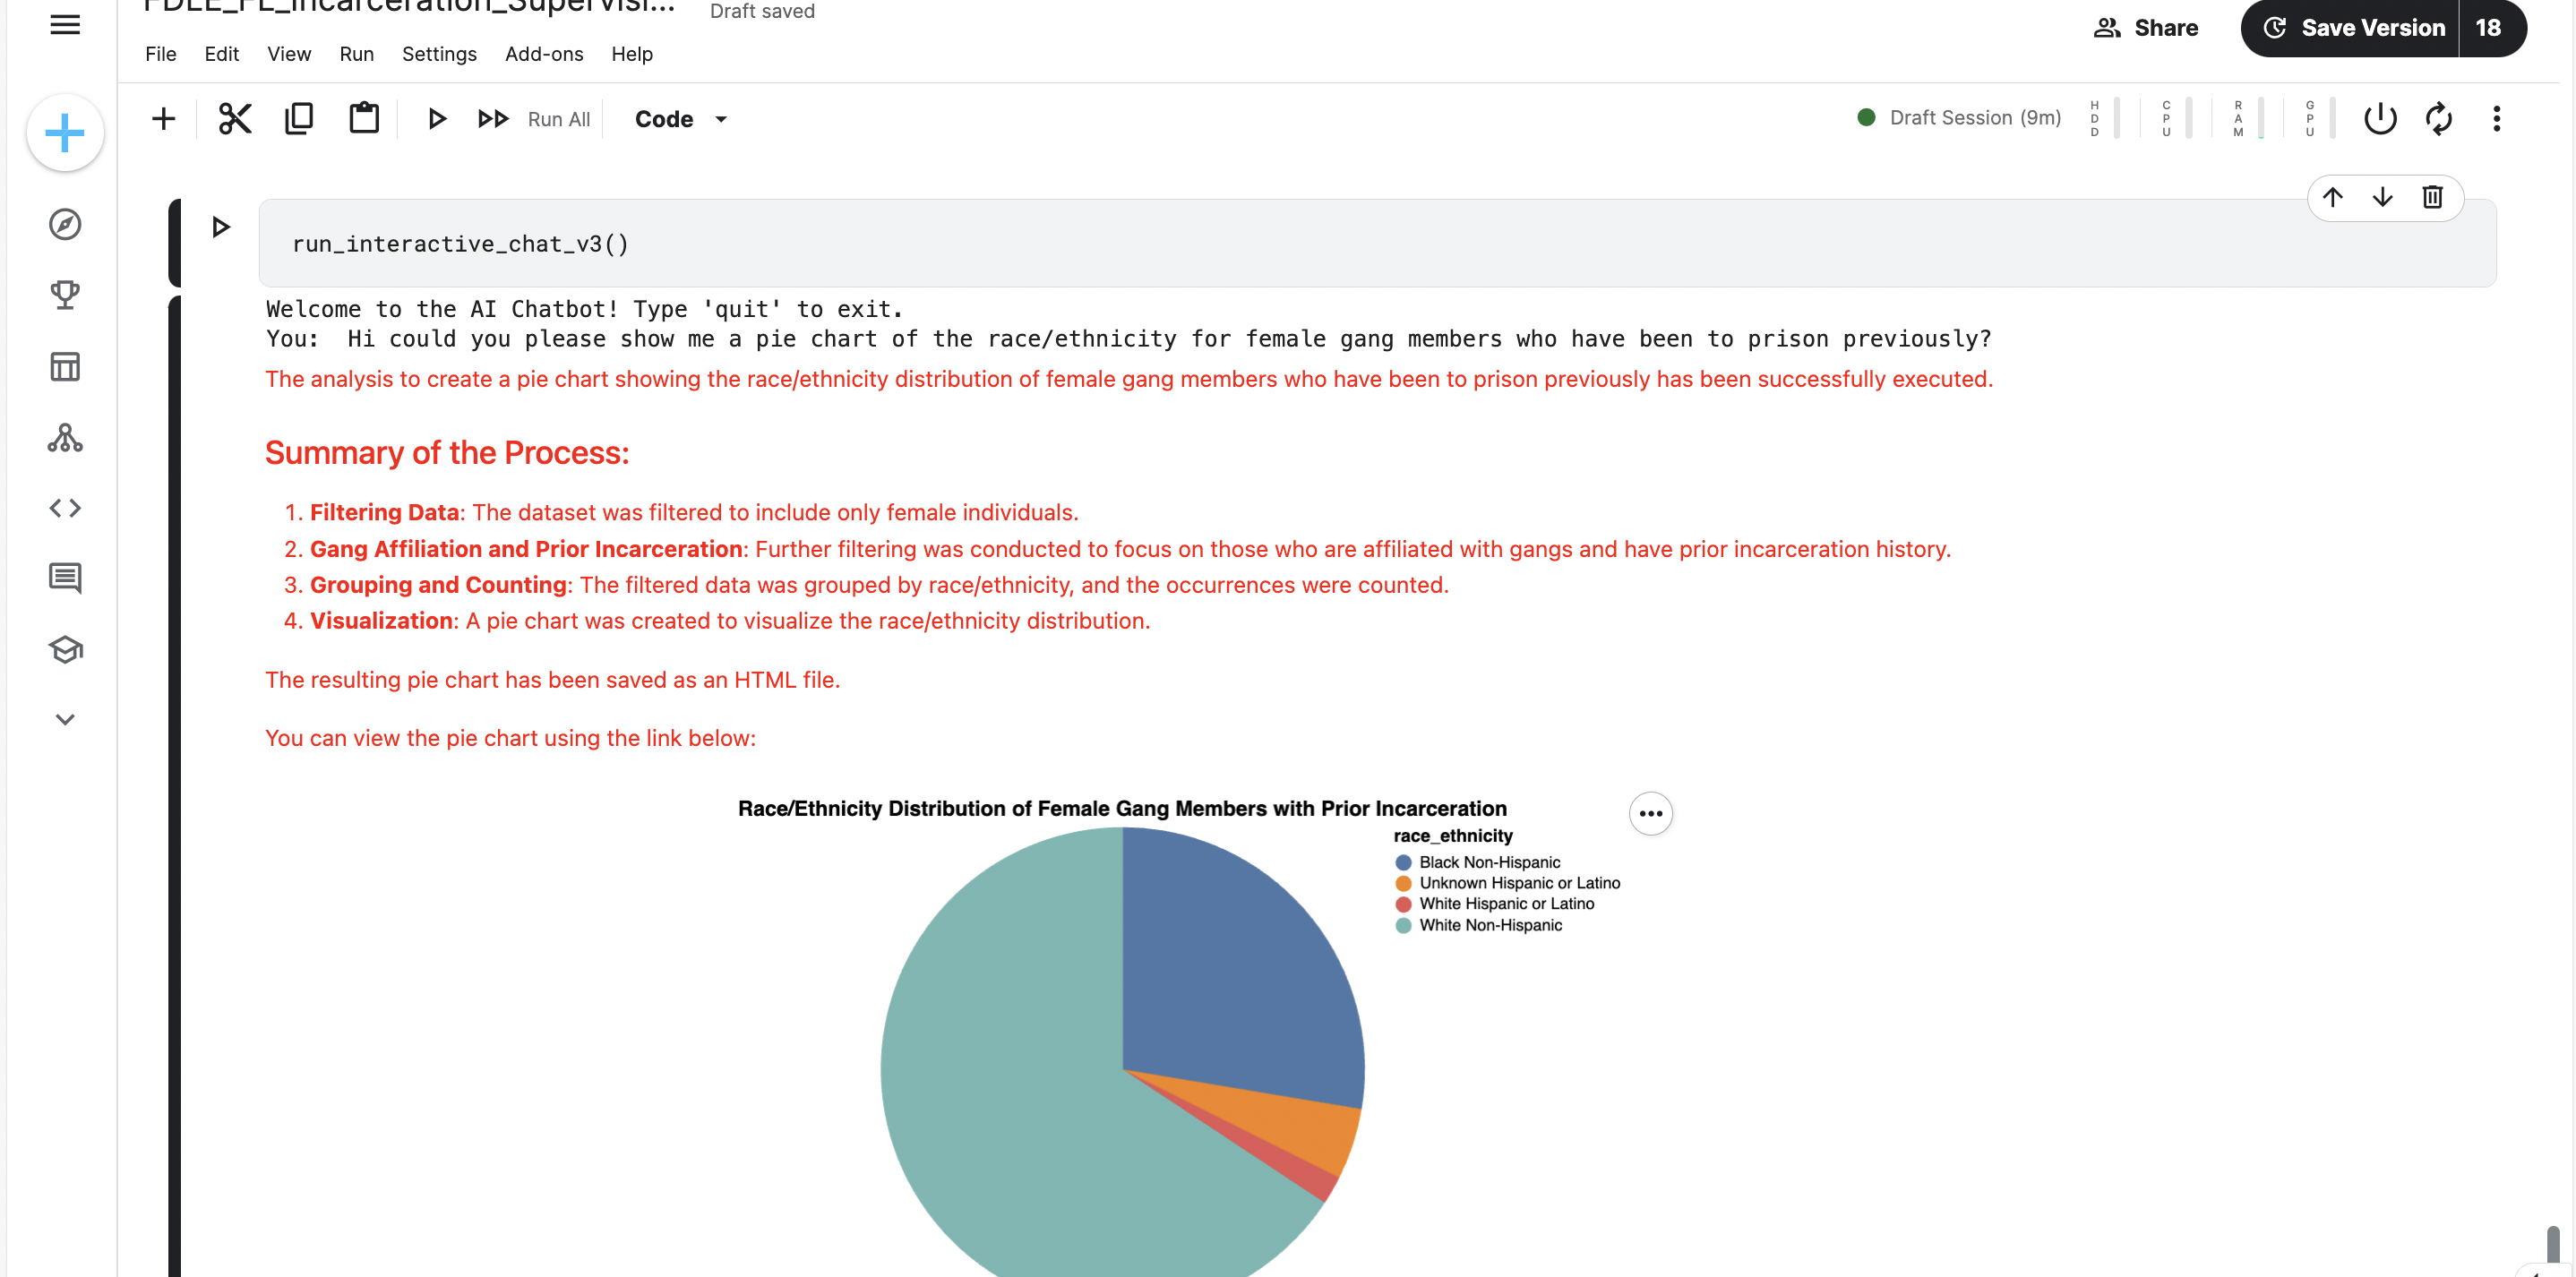

In [40]:
# Display of interactive chat screenshot to demonstrate functionality (though it still needs a great deal of tranining):
display(Image(filename='/kaggle/input/screenshot-chat/Screenshot 2024-07-27 at 4.43.11PM.png'))